# Preprocessing Steps

### Importing the necessary libraries

- **NumPy**: A library for numerical computing in Python, used for handling arrays and mathematical operations.
- **Pandas**: A library for data manipulation and analysis, used for working with structured data such as time series and tabular data.
- **Random**: A module for generating random numbers and sequences.
- **Tensorflow**: An open-source machine learning library, used for building and training neural networks.
- **MplCursors**: A library for interactive data visualization, used for adding cursor functionality to matplotlib plots.
- **MatPlot**: A library for creating visualizations in Python, used for creating plots and charts.
- **Date Time**: A module for working with dates and times in Python.
- **TCN**: A library for building Temporal Convolutional Networks (TCNs), used for sequence modeling tasks such as time series forecasting.
- **SkLearn**: A library for machine learning algorithms and tools, used for preprocessing data and building models.
- **XGBoost**: A library for machine learning XGBoost algorithms.
- **Granger Causality Tests**: A function in the statsmodels library for testing the Granger causality between two time series.
- **yfinance**: A library for retrieving historical market data from Yahoo Finance, used for downloading stock price data for analysis.

In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import mplcursors

import matplotlib.pyplot as plt
import datetime as dt


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor

from xgboost import XGBRegressor

from tcn import TCN, tcn_full_summary

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Conv1D, Flatten, RepeatVector, TimeDistributed, Input, SimpleRNN
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from statsmodels.tsa.stattools import grangercausalitytests

import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

### Setting the Random Seed
This block sets the random seed for three different modules: **Random**, **NumPy**, and **Tensorflow**, respectively. 

Setting a `seed` ensures that the same sequence of random numbers is generated each time the code is run. This can be helpful for reproducibility and debugging purposes, as well as for ensuring consistent results across different runs of the same code. In this particular case, the `seed` value used is 42, which is a commonly used value for demonstration purposes.

In [2]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

### Getting Data

In the next two blocks of code, the `yf.Ticker()` function from the `yfinance` library is used to create a ticker object for two stock symbols TotalEnergies SE (TTE) & Crude Oil (CL=F).

Next, the start and end dates for the historical data are defined as strings and stored in the variables `start_date` and `end_date`, respectively.

The `total.history()` method is then called on the total object, passing in the start and end dates as arguments. This method retrieves the historical pricing data for the specified stock symbol within the specified date range and returns a `Pandas DataFrame` object, which is stored in a variable. The DataFrame contains columns such as "Open", "High", "Low", "Close", and "Volume", representing the stock prices and trading volume for each day within the specified date range.

In [3]:
total = yf.Ticker("TTE")
start_date = "2005-01-01"
end_date = "2023-01-31"
hist_total = total.history(start=start_date, end=end_date)
hist_total.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2005-01-03 00:00:00-05:00,19.514650,19.527178,19.167452,19.185349,1389200,0.0,0.0
2005-01-04 00:00:00-05:00,19.017115,19.131655,18.925841,18.927631,1627000,0.0,0.0
2005-01-05 00:00:00-05:00,18.898998,18.959848,18.802356,18.838150,1535000,0.0,0.0
2005-01-06 00:00:00-05:00,18.784463,18.992066,18.755829,18.899002,1161800,0.0,0.0
2005-01-07 00:00:00-05:00,18.929419,18.950895,18.564326,18.734344,1223800,0.0,0.0


In [4]:
oil = yf.Ticker("CL=F")
start_date = "2005-01-01"
end_date = "2023-01-31"
hist_oil = oil.history(start=start_date, end=end_date)
hist_oil.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2005-01-03 00:00:00-05:00,43.099998,43.099998,41.250000,42.119999,69484,0.0,0.0
2005-01-04 00:00:00-05:00,42.180000,44.130001,41.849998,43.910000,100665,0.0,0.0
2005-01-05 00:00:00-05:00,43.900002,44.000000,42.599998,43.389999,91011,0.0,0.0
2005-01-06 00:00:00-05:00,43.389999,45.750000,42.799999,45.560001,122411,0.0,0.0
2005-01-07 00:00:00-05:00,45.500000,46.099998,44.750000,45.430000,99725,0.0,0.0


### Merging the two data sets

Two `Pandas` data frames hist_oil and hist_total are merged based on their "Date" column using the `pd.merge()` function from the `Pandas` library. The merged data frame is stored in the variable `merged_df`. Next, the `drop()` method is used to remove unnecessary columns from the merged data frame. Finally, the `isna().sum()` method is used to count the number of missing values in each column of the `merged_df` data frame. 

In [5]:
merged_df = pd.merge(hist_oil, hist_total, on='Date')
merged_df = merged_df.drop(['Dividends_x', 'Stock Splits_x', 'Dividends_y', 'Stock Splits_y'], axis=1)
print(merged_df.isna().sum())

Open_x      0
High_x      0
Low_x       0
Close_x     0
Volume_x    0
Open_y      0
High_y      0
Low_y       0
Close_y     0
Volume_y    0
dtype: int64


### Granger Causality Test

The function `find_granger_causal_columns` takes two arguments: `data`, which is a Pandas data frame containing time-series data, and `target_column`, which is the name of the column for which Granger causality is to be tested. For each column that is not the `target_column`, the function performs the Granger causality test between that column and the `target_column` using `grangercausalitytests` function.

It extracts the p-value from the F-test and checks if the p-value is less than 0.05. If it is, it adds the pair of column names to the `causal_cols` list. Finally, the function returns the list of column pairs that exhibit Granger causality with the `target_column`.

In [6]:
def find_granger_causal_columns(data, target_column):
    causal_cols = []
    for col in data.columns:
        if col != target_column:
            res = grangercausalitytests(data[[col, target_column]], maxlag=2, verbose=False)
            p_value = res[2][0]['ssr_ftest'][1]
            if p_value < 0.05:
                causal_cols.append((col, target_column))
    return causal_cols
find_granger_causal_columns(merged_df, 'Close_y')

[('Open_x', 'Close_y'),
 ('High_x', 'Close_y'),
 ('Low_x', 'Close_y'),
 ('Close_x', 'Close_y'),
 ('Volume_x', 'Close_y'),
 ('Open_y', 'Close_y'),
 ('High_y', 'Close_y'),
 ('Low_y', 'Close_y'),
 ('Volume_y', 'Close_y')]

### Statistical Summary
The `describe()` function of `Pandas` is used to generate a statistical summary of the numerical columns of the `merged_df` data frame. The resulting summary includes count (number of non-null values), mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum for each numerical column.

In [7]:
summary = merged_df.describe()
summary

,Open_x,High_x,Low_x,Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Volume_y
count,4545.000000,4545.000000,4545.000000,4545.000000,4.545000e+03,4545.000000,4545.000000,4545.000000,4545.000000,4.545000e+03
mean,71.380326,72.483287,70.188367,71.365914,3.565750e+05,32.487074,32.739002,32.213058,32.480991,2.262368e+06
std,22.388534,22.576328,22.196994,22.423538,2.086906e+05,8.343389,8.374663,8.297626,8.327744,1.507957e+06
min,-14.000000,13.690000,-40.320000,-37.630001,1.314000e+03,17.787852,18.711082,17.566534,18.368755,2.106000e+05
25%,53.400002,54.130001,52.549999,53.380001,2.177300e+05,26.124416,26.337288,25.918522,26.166039,1.296600e+06
50%,68.500000,69.480003,67.400002,68.489998,3.075640e+05,30.901879,31.186248,30.654720,30.946510,1.891900e+06
75%,90.080002,91.440002,88.459999,90.129997,4.599980e+05,38.505379,38.745557,38.256932,38.526569,2.758900e+06
max,145.190002,147.270004,143.220001,145.289993,2.288230e+06,64.136270,64.205361,63.593410,63.790810,2.705530e+07


### Moving Averages (MA)

The function `calculate_price_metrics` calculates different moving averages (MA) of the `Close_y` column of a `pandas` data frame (`df`) over different time windows (3, 7, 10, 15, and 20 days) and adds these columns to the data frame. A moving average is a widely used technical analysis tool that smooths out the price data by creating a constantly updated average price, providing a clearer picture of the trend direction.

In [8]:
def calculate_price_metrics(df):
    df['MA3'] = df['Close_y'].rolling(window=3, min_periods=1).mean()
    df['MA7'] = df['Close_y'].rolling(window=7, min_periods=1).mean()
    df['MA10'] = df['Close_y'].rolling(window=10, min_periods=1).mean()
    df['MA15'] = df['Close_y'].rolling(window=15, min_periods=1).mean()
    df['MA20'] = df['Close_y'].rolling(window=20, min_periods=1).mean()
    return df
merged_df = calculate_price_metrics(merged_df)

### Correlation Coefficients

This code calculates the correlation coefficients between all columns (features) and the target column (Close price of a stock) in the `merged_df` data frame. The `corr()` function is used to calculate the correlation matrix of the data frame.

By default, the Pearson correlation coefficient is used, which measures the linear relationship between two variables. The coefficient can range from -1 to 1, where a value of -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation.

In [9]:
corr_matrix = merged_df.corr()['Close_y']
print(corr_matrix)

Open_x      0.111995
High_x      0.113812
Low_x       0.113026
Close_x     0.113502
Volume_x    0.373018
Open_y      0.999070
High_y      0.999537
Low_y       0.999551
Close_y     1.000000
Volume_y   -0.228056
MA3         0.998668
MA7         0.995608
MA10        0.993241
MA15        0.989453
MA20        0.985875
Name: Close_y, dtype: float64


### Normalization of Data

RobustScaler: A preprocessing technique used to scale numerical features in a dataset. Unlike standard scaling, which normalizes the data using the mean and standard deviation, RobustScaler uses the median and interquartile range to scale the data. It is a more robust method as it is less sensitive to outliers in the data. Therefore, it is useful when the data contains extreme values or outliers that could affect the scaling process. This is performed by feature scaling using `RobustScaler`.

The `fit_transform()` method is used to scale the merged data frame `merged_df`, and the result is stored in `scaled_merged_df`, which is a `Numpy` array. The `pd.DataFrame()` method is then used to convert the numpy array back to a pandas data frame, with the same column names as `merged_df`. The scaled values in `scaled_merged_df` have zero mean and unit variance, making it easier for the machine learning algorithms and deep learning methods to process the data.

In [10]:
scaler = RobustScaler()
scaled_merged_df = scaler.fit_transform(merged_df)
scaled_merged_df = pd.DataFrame(scaled_merged_df, columns=merged_df.columns)

### Splitting the Data

We have split the scaled merged data into three sets for training, validation, and testing. Splitting the data into three sets for training, validation, and testing is important for evaluating the performance of the machine learning or deep learning model. 
- The training set is used to train the model on the given data.
- The validation set is used to tune the hyperparameters of the model and prevent overfitting.
- The testing set is used to evaluate the final performance of the model on unseen data.
By using separate sets for training, validation, and testing, we can ensure that the model is not overfitting and is generalizing well to new data.

The `train_test_split` function is used to split the data into the three sets. The `test_size` argument specifies the proportion of data that is used for testing (20% in this case), and the `random_state` argument sets the random seed for reproducibility. The `shuffle` argument is set to `False` to preserve the time order of the data.

In [11]:
X_train1, X_test1 = train_test_split(scaled_merged_df, test_size=0.2, random_state=42, shuffle=False)
Y_train1, Y_test1 = train_test_split(scaled_merged_df['Close_y'], test_size=0.2, random_state=42, shuffle=False)
X_train1, X_val1, Y_train1, Y_val1 = train_test_split(
    X_train1, Y_train1, test_size=0.1, random_state=42, shuffle=False)

### Reshaping the Data

We reshape the data into a 3D tensor with shape (`sample_size`, `input_dim`, `samples`) where `sample_size` is the number of samples in each sample, `input_dim` is the number of input features, and `samples` are the number of samples we are using to train or test the model.

In [12]:
X_train1 = X_train1.values.reshape(X_train1.values.shape[0], X_train1.values.shape[1], 1)
X_test1 = X_test1.values.reshape(X_test1.values.shape[0], X_test1.values.shape[1], 1)
X_val1 = X_val1.values.reshape(X_val1.values.shape[0], X_val1.values.shape[1], 1)
Y_train1 = Y_train1.values.reshape(Y_train1.values.shape[0], 1)
Y_test1 = Y_test1.values.reshape(Y_test1.values.shape[0], 1)
Y_val1 = Y_val1.values.reshape(Y_val1.values.shape[0], 1)

### Shifting the Target

We have defined a function, `shift_target` that takes a 2D `NumPy` array `arr` as input and returns a new array with the same shape where the elements are shifted down by 1 row. First we delete the first row of the array using `np.delete(arr, 0, axis=0)`. Add a new row at the bottom of the array with the same values as the last row. 

The final result is a new array with the same shape as the input array, but with the elements shifted down by 1 row. The last row in the new array has the same values as the last row in the original array.

In [13]:
def shift_target(arr):
    arr = np.delete(arr, 0, axis=0)
    last_val = arr[-1]
    new_row = np.array([last_val])
    arr = np.concatenate((arr, new_row), axis=0)
    arr = np.delete(arr, 0, axis=0)
    last_val = arr[-1]
    new_row = np.array([last_val])
    arr = np.concatenate((arr, new_row), axis=0)
    return arr
Y_train1 = shift_target(Y_train1)
Y_test1 = shift_target(Y_test1)
Y_val1 = shift_target(Y_val1)

# Long Short-Term Memory (LSTM)

### Design of LSTM
We have designed a Long Short-Term Memory (LSTM) model for stock price prediction. The LSTM model is a type of Recurrent Neural Network (RNN) that can model sequential data and is well-suited for time series data. Here's what each step of the function does:

- Initialize a `Sequential` model using the `Keras` library.
- Add the first `LSTM` layer with 50 units, input shape of (15, 1) (15 refers to the number of features used in the model), and return sequences.
- Add a `Dropout` layer to prevent overfitting of the model to the training data.
- Add a second `LSTM` layer with 50 units and return sequences.
- Add a `Dropout` layer to prevent overfitting.
- Add a third `LSTM` layer with 50 units and return sequences.
- Add a `Dropout` layer to prevent overfitting.
- Add a fourth `LSTM` layer with 50 units.
- Add a `Dropout` layer to prevent overfitting.
- Add a `Dense` output layer with one unit, which will output the predicted stock price.

Given input sequence ${x_1, x_2, ..., x_t}$ and LSTM layer with $n$ hidden units, the LSTM layer computes the following for each time step $t$:

1. **Input gate** $i_t$: Determines which values from the input $x_t$ and previous cell state $c_{t-1}$ will be updated.

$$i_t = \sigma(W_{xi}x_t + W_{hi}h_{t-1} + W_{ci}c_{t-1} + b_i)$$

2. **Forget gate** $f_t$: Determines which values from the previous cell state $c_{t-1}$ will be discarded.

$$f_t = \sigma(W_{xf}x_t + W_{hf}h_{t-1} + W_{cf}c_{t-1} + b_f)$$

3. **Output gate** $o_t$: Determines which values from the updated cell state $c_t$ will be output as $h_t$.

$$o_t = \sigma(W_{xo}x_t + W_{ho}h_{t-1} + W_{co}c_t + b_o)$$

4. **Candidate cell state** $\tilde{c}_t$: Computes candidate values for the updated cell state $c_t$.

$$\tilde{c}_t = \sigma(W_{xc}x_t + W_{hc}h_{t-1} + b_c)$$

5. **Cell state** $c_t$: Updates the cell state using the input gate, forget gate, and candidate cell state.

$$c_t = f_t  c_{t-1} + i_t \tilde{c}_t$$

6. **Hidden state** $h_t$: Computes the hidden state (output) of the LSTM layer.

$$h_t = o_t  \sigma(c_t)$$

Where $\sigma$ is the sigmoid function, $\odot$ denotes element-wise multiplication, $W$ are the weight matrices, and $b$ are the bias terms.

The final Dense layer computes a linear combination of the input values (outputs from the last LSTM layer):

$$y = W_{out}h_{final} + b_{out}$$


In [14]:
def LSTM_model():
    """
    Create and configure an LSTM model for stock price prediction.

    :return: The configured LSTM model
    """

    model = Sequential()

    model.add(LSTM(units=50, return_sequences=True, input_shape=(15, 1)))
    model.add(Dropout(0.4))

    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.4))

    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.4))
    
    model.add(LSTM(units=50))
    model.add(Dropout(0.4))

    model.add(Dense(units=1))

    return model

### Compiling LSTM Model
We summarize the architecture of the model using the `summary()` method. Next, we set the optimizer to `Adam` with a learning rate of 0.0001, which is a popular optimizer used in deep learning for updating model parameters during training. The learning rate is set lower than the default version after running the code multiple times to find the optimal value.

Finally, it compiles the model using the `Adam` optimizer and a loss function of mean squared error (MSE), which is a common loss function used for regression problems, including stock price prediction.

In [15]:
model_LSTM = LSTM_model()
model_LSTM.summary()

optimizer_LSTM = tf.keras.optimizers.Adam(learning_rate=0.0001)

model_LSTM.compile(
    optimizer=optimizer_LSTM,
    loss='mean_squared_error'
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 15, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 15, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 15, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 15, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 15, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

### Training LSTM Model
We train the LSTM model (`model_LSTM`) on the training data (`X_train1` and `Y_train1`) with a batch size of 60 for 10 epochs. The validation data (`X_val1` and `Y_val1`) are used to evaluate the model after each epoch.

The `EarlyStopping` callback is used to stop the training process if the validation loss does not improve after a certain number of epochs (10 in this case). This is done to prevent overfitting and to find the best performing model on the validation data.

The `use_multiprocessing` parameter is set to `True` to enable multiprocessing, which speeds up the training process by using multiple CPU cores. The training history is saved in the `history_LSTM` variable.

In [16]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_LSTM = model_LSTM.fit(X_train1, Y_train1, epochs=10, batch_size=60, 
                    validation_data=(X_val1, Y_val1), 
                    use_multiprocessing=True,
                   callbacks=[early_stopping])

Epoch 1/10
55/55 [==============================] - 9s 53ms/step - loss: 0.1663 - val_loss: 0.9518
Epoch 2/10
55/55 [==============================] - 1s 26ms/step - loss: 0.1069 - val_loss: 0.7169
Epoch 3/10
55/55 [==============================] - 1s 25ms/step - loss: 0.0847 - val_loss: 0.5404
Epoch 4/10
55/55 [==============================] - 1s 25ms/step - loss: 0.0592 - val_loss: 0.2532
Epoch 5/10
55/55 [==============================] - 1s 25ms/step - loss: 0.0410 - val_loss: 0.0690
Epoch 6/10
55/55 [==============================] - 1s 25ms/step - loss: 0.0351 - val_loss: 0.0376
Epoch 7/10
55/55 [==============================] - 1s 25ms/step - loss: 0.0333 - val_loss: 0.0308
Epoch 8/10
55/55 [==============================] - 1s 25ms/step - loss: 0.0315 - val_loss: 0.0350
Epoch 9/10
55/55 [==============================] - 1s 25ms/step - loss: 0.0307 - val_loss: 0.0269
Epoch 10/10
55/55 [==============================] - 1s 25ms/step - loss: 0.0287 - val_loss: 0.0247


### Ploting the Loss Function
We have ploted the training loss and validation loss values over the epochs of training the LSTM model. The `history_LSTM` object contains the loss values and validation loss values for each epoch. The plot can be used to evaluate the performance of the model and check for overfitting or underfitting. If the training loss continues to decrease while the validation loss starts to increase or remains stagnant, it indicates overfitting.

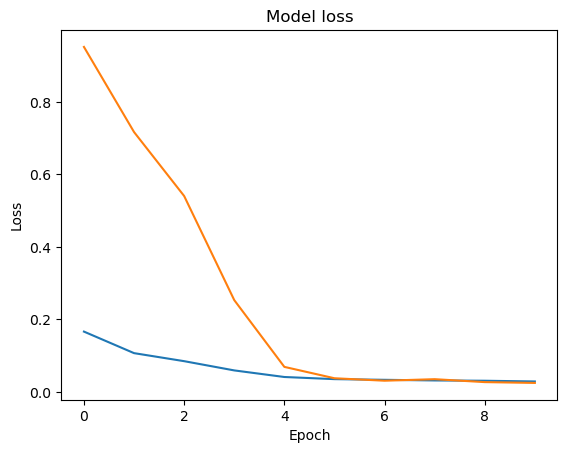

In [17]:
loss_values = history_LSTM.history['loss']
val_loss = history_LSTM.history['val_loss']
plt.plot(loss_values, label= 'Training Loss')
plt.plot(val_loss, label= 'Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Predicting using LSTM

We have predicted the stock price for the entire dataset after training the LSTM model.

- `scaled_merged_df_copy` is a copy of the original scaled and merged dataset.
- The predicted values for the target variable are obtained using the `model_LSTM.predict()` method applied to the `scaled_merged_df_copy` data. The predicted values are retrieved using the index, which extracts the first column of the predicted data (since it is a single-column output).
- The `scaler.inverse_transform()` method is used to transform the predicted data back to the original scale.
- The resulting data frame is converted to only contain the `Close_y` column, which contains the predicted stock price.

In [18]:
scaled_merged_df_copy = scaled_merged_df.copy()
scaled_merged_df_copy['Close_y'] = model_LSTM.predict(scaled_merged_df_copy)[:, 0]
Predict_LSTM = scaler.inverse_transform(scaled_merged_df_copy)
Predict_LSTM = pd.DataFrame(Predict_LSTM, columns=scaled_merged_df_copy.columns)
Predict_LSTM = Predict_LSTM['Close_y']

143/143 [==============================] - 2s 7ms/step


### LSTM Prediction & Actual Visualization

We have generated a plot of the actual and predicted stock prices over time.

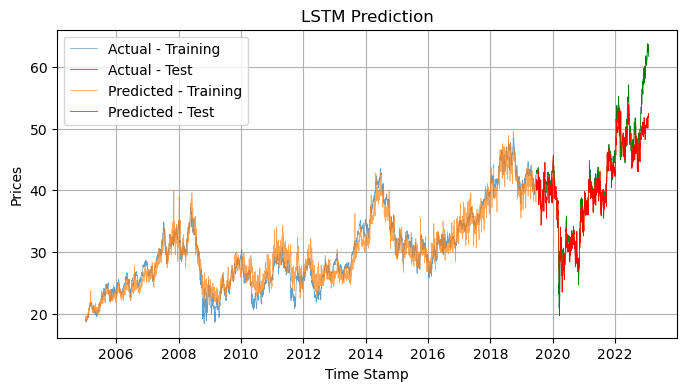

In [19]:
plt.figure(figsize=(8, 4))

plt.plot(merged_df.index, merged_df['Close_y'], label="Actual - Training", linewidth=0.5, alpha=0.7)
plt.plot(merged_df.index[-909:], merged_df['Close_y'][-909:], label="Actual - Test", color='green', linewidth=0.5)

plt.plot(merged_df.index, Predict_LSTM, label="Predicted - Training", linewidth=0.5, alpha=0.7)
plt.plot(merged_df.index[-909:], Predict_LSTM[-909:], label="Predicted - Test", color='red', linewidth=0.5)



plt.title('LSTM Prediction')
plt.xlabel('Time Stamp')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)


plt.show()

# Gated Recurrent Unit (GRU)

### Designing GRU Model
We have designed a GRU (Gated Recurrent Unit) model for stock price prediction. GRU (Gated Recurrent Unit) is a type of recurrent neural network (RNN) that can be used for sequence prediction tasks, including stock price prediction. GRU networks are effective for sequence prediction because they are able to capture long-term dependencies in the input data, which is important for modeling complex patterns in stock prices. GRU networks have fewer parameters than LSTM networks, which can make them faster to train and less prone to overfitting.

- First, we initialize a sequential model using the `Sequential()` function from `Keras`.
- Then, we add four GRU layers to the model using the `GRU()` function from Keras, each with 50 units. The first three layers have return_sequences=True, which means they will return the entire sequence of outputs, while the last layer does not have this argument and will only return the last output.
- After each GRU layer, there is a `Dropout()` layer with a dropout rate of 0.4, which helps prevent overfitting.
- Finally, a dense output layer with one unit is added to the model using the `Dense()` function from `Keras`.

Given input sequence ${x_1, x_2, ..., x_t}$ and GRU layer with $n$ hidden units, the GRU layer computes the following for each time step $t$:

1. Update gate $z_t$: Determines how much of the previous hidden state $h_{t-1}$ should be updated with the new candidate hidden state $\tilde{h}_t$.

$$z_t = \sigma(W_{xz}x_t + W_{hz}h_{t-1} + b_z)$$

2. Reset gate $r_t$: Controls the amount of information from the previous hidden state $h_{t-1}$ that should be considered for the candidate hidden state $\tilde{h}_t$.

$$r_t = \sigma(W_{xr}x_t + W_{hr}h_{t-1} + b_r)$$


3. Candidate hidden state $\tilde{h}t$: Computes the candidate hidden state based on the input $x_t$ and a modified version of the previous hidden state $r_t \odot h{t-1}$.

$$\tilde{h}_t = \tanh(W_{xh}x_t + W_{hh}(r_t \odot h_{t-1}) + b_h)$$


4. New hidden state $h_t$: Combines the previous hidden state $h_{t-1}$ and the candidate hidden state $\tilde{h}_t$ using the update gate $z_t$.

$$h_t = (1 - z_t) \odot h_{t-1} + z_t \odot \tilde{h}_t$$


In [20]:
def GRU_model():
    """
    Create and configure a GRU model for stock price prediction.

    :return: The configured GRU model (keras.Sequential)
    """

    model = Sequential()

    model.add(GRU(units=50, return_sequences=True, input_shape=(15, 1)))
    model.add(Dropout(0.4))

    model.add(GRU(units=50, return_sequences=True))
    model.add(Dropout(0.4))

    model.add(GRU(units=50, return_sequences=True))
    model.add(Dropout(0.4))
    
    model.add(GRU(units=50))
    model.add(Dropout(0.4))

    model.add(Dense(units=1))

    return model

### Compiling GRU Model
We create a GRU model using the `GRU_model()` function and then print a summary of the model's architecture using the `summary()` method. Next, the code sets the optimizer for the model using the `Adam()` optimizer with a smaller learning rate of 0.0001. The model is then compiled with the optimizer and the mean squared error loss function using the `compile()` method. This prepares the model for training.

In [21]:
model_GRU = GRU_model()
model_GRU.summary()

optimizer_GRU = tf.keras.optimizers.Adam(learning_rate=0.0001)

model_GRU.compile(
    optimizer=optimizer_GRU,
    loss='mean_squared_error'
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 15, 50)            7950      
                                                                 
 dropout_4 (Dropout)         (None, 15, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 15, 50)            15300     
                                                                 
 dropout_5 (Dropout)         (None, 15, 50)            0         
                                                                 
 gru_2 (GRU)                 (None, 15, 50)            15300     
                                                                 
 dropout_6 (Dropout)         (None, 15, 50)            0         
                                                                 
 gru_3 (GRU)                 (None, 50)               

### Training the GRU Model
We train the GRU (Gated Recurrent Unit) model on the training data (`X_train1` and `Y_train1`) using `model_GRU.fit()`. We specified the number of epochs to train for (`epochs=10`), the batch size (`batch_size=60`), the validation data (`validation_data=(X_val1, Y_val1)`), and the `early_stopping` callback to stop training if the validation loss does not improve for a certain number of epochs. During training, the model will use the `Adam` optimizer with a learning rate of 0.0001, and the mean squared error loss function. The `use_multiprocessing=True` option enables parallel processing during training to speed up computation.

In [22]:
history_GRU = model_GRU.fit(X_train1, Y_train1, epochs=10, batch_size=60, 
                    validation_data=(X_val1, Y_val1), 
                    use_multiprocessing=True,
                   callbacks=[early_stopping])

Epoch 1/10
55/55 [==============================] - 10s 57ms/step - loss: 0.1115 - val_loss: 0.2470
Epoch 2/10
55/55 [==============================] - 1s 21ms/step - loss: 0.0434 - val_loss: 0.0598
Epoch 3/10
55/55 [==============================] - 1s 21ms/step - loss: 0.0364 - val_loss: 0.0435
Epoch 4/10
55/55 [==============================] - 1s 21ms/step - loss: 0.0324 - val_loss: 0.0325
Epoch 5/10
55/55 [==============================] - 1s 21ms/step - loss: 0.0284 - val_loss: 0.0300
Epoch 6/10
55/55 [==============================] - 1s 21ms/step - loss: 0.0241 - val_loss: 0.0210
Epoch 7/10
55/55 [==============================] - 1s 21ms/step - loss: 0.0220 - val_loss: 0.0163
Epoch 8/10
55/55 [==============================] - 1s 21ms/step - loss: 0.0205 - val_loss: 0.0169
Epoch 9/10
55/55 [==============================] - 1s 22ms/step - loss: 0.0185 - val_loss: 0.0171
Epoch 10/10
55/55 [==============================] - 1s 21ms/step - loss: 0.0187 - val_loss: 0.0161


### Ploting the Loss Function
We have ploted the training loss and validation loss values over the epochs of training the GRU model just as like we did for LSTM.

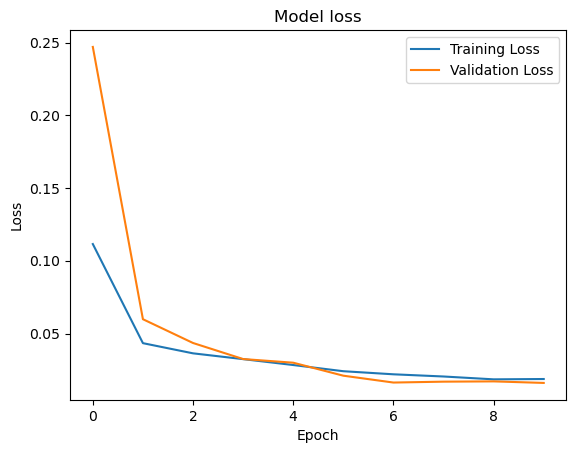

In [23]:
loss_values_GRU = history_GRU.history['loss']
val_loss_GRU = history_GRU.history['val_loss']
plt.plot(loss_values_GRU, label= 'Training Loss')
plt.plot(val_loss_GRU, label= 'Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Predicting using GRU

We have predicted the stock price for the entire dataset after training the GRU model.

In [24]:
scaled_merged_df_GRU = scaled_merged_df.copy()
scaled_merged_df_GRU['Close_y'] = model_GRU.predict(scaled_merged_df_GRU)[:, 0]
Predict_GRU = scaler.inverse_transform(scaled_merged_df_GRU)
Predict_GRU = pd.DataFrame(Predict_GRU, columns=scaled_merged_df.columns)
Predict_GRU = Predict_GRU['Close_y']

143/143 [==============================] - 2s 5ms/step


### GRU Prediction & Actual Visualization

We have generated a plot of the actual and predicted stock prices over time.

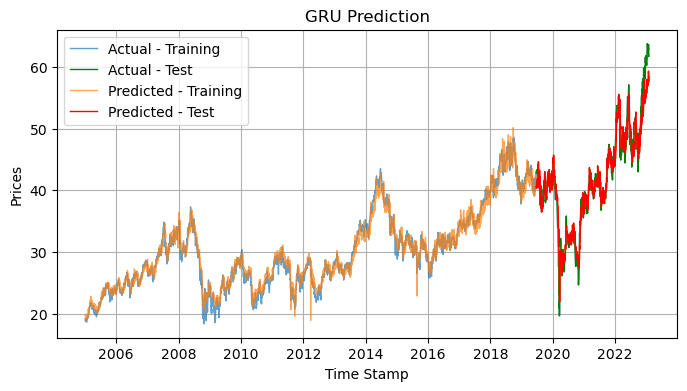

In [25]:
plt.figure(figsize=(8, 4))

plt.plot(merged_df.index, merged_df['Close_y'], label="Actual - Training", linewidth=1, alpha=0.7)
plt.plot(merged_df.index[-909:], merged_df['Close_y'][-909:], label="Actual - Test", color='green', linewidth=1)

plt.plot(merged_df.index, Predict_GRU, label="Predicted - Training", linewidth=1, alpha=0.7)
plt.plot(merged_df.index[-909:], Predict_GRU[-909:], label="Predicted - Test", color='red', linewidth=1)



plt.title('GRU Prediction')
plt.xlabel('Time Stamp')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)

mplcursors.cursor(hover=False)

plt.show()

#  Convolutional Neural Network (CNN) model

### Designing CNN Model
We have designed a Convolutional Neural Network (CNN) model for stock price prediction. A CNN is a type of neural network that is commonly used for image recognition, but it can also be used for time series data. The `CNN_model()` function initializes a Sequential model and adds three `Conv1D` layers, each with 64 filters, kernel size 3, and `ReLU` activation function. `Dropout` is added to each layer to prevent overfitting. The output from the convolutional layers is then flattened, and a dense output layer with one unit is added. After defining the model, the summary of the model is printed using model.summary(). Then, the model is compiled using an optimizer (Adam) with a learning rate of 0.0001 and mean_squared_error as the loss function.

Given input sequence ${x_1, x_2, ..., x_t}$ and a 1D convolutional neural network (CNN) model with multiple Conv1D layers, the CNN computes the following for each layer $l$:

1. Conv1D layer: Applies a 1D convolution operation on the input, which consists of applying a set of filters (kernels) to the input to extract local features. The output is called a feature map. Each filter has a width (kernel_size) and a specified number of filters.

$$ 
\quad F_{lj} = \sum_{i=1}^{k} x_{li} \cdot w_{lij} + b_{lj}, \quad \text{for } j = 1, 2, \dots, n_l,
$$

where $x_{li}$ is the input value at position $i$ in layer $l$, $w_{lij}$ is the weight associated with position $i$ in filter $j$, $b_{lj}$ is the bias term for filter $j$, and $n_l$ is the number of filters in layer $l$.

2. Activation function (ReLU): The Rectified Linear Unit (ReLU) activation function is applied to the output of the Conv1D layer.

$$
\quad R(x) = \max(0, x),
$$
where $x$ is the input value.


3. Dropout layer: A regularization technique that helps prevent overfitting. During training, the dropout layer randomly sets a fraction of input units to 0 at each update.

4. Flatten layer: This layer is used to convert the output of the last Conv1D layer into a one-dimensional array.

5. Dense output layer: The final fully connected layer that combines the features learned by the previous layers and produces the output prediction.

$$
\quad y = \sum_{i=1}^{m} x_i \cdot w_i + b,
$$

where $x_i$ is the input value at position $i$, $w_i$ is the weight associated with position $i$, $b$ is the bias term, and $m$ is the number of input values.

In [26]:
def CNN_model():
    """
    Create and configure a CNN model for stock price prediction.

    :return: The configured CNN model (keras.Sequential)
    """

    model = Sequential()

    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(15, 1)))
    model.add(Dropout(0.4))

    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.4))

    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.4))

    model.add(Flatten())

    model.add(Dense(units=1))

    return model

In [27]:
model_CNN = CNN_model()
model_CNN.summary()

optimizer_CNN = tf.keras.optimizers.Adam(learning_rate=0.0001)

model_CNN.compile(
    optimizer=optimizer_CNN,
    loss='mean_squared_error'
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 13, 64)            256       
                                                                 
 dropout_8 (Dropout)         (None, 13, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            12352     
                                                                 
 dropout_9 (Dropout)         (None, 11, 64)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 9, 64)             12352     
                                                                 
 dropout_10 (Dropout)        (None, 9, 64)             0         
                                                                 
 flatten (Flatten)           (None, 576)              

### Training the CNN Model
We train the CNN model on the training data (`X_train1` and `Y_train1`) using `model_CNN.fit()`. We specified the number of epochs to train for (`epochs=10`), the batch size (`batch_size=60`), the validation data (`validation_data=(X_val1, Y_val1)`), and the `early_stopping` callback to stop training if the validation loss does not improve for a certain number of epochs. During training, the model will use the `Adam` optimizer with a learning rate of 0.0001, and the mean squared error loss function. The `use_multiprocessing=True` option enables parallel processing during training to speed up computation.

In [28]:
history_CNN = model_CNN.fit(X_train1, Y_train1, epochs=10, batch_size=60, 
                    validation_data=(X_val1, Y_val1), 
                    use_multiprocessing=True,
                   callbacks=[early_stopping])

Epoch 1/10
55/55 [==============================] - 1s 9ms/step - loss: 0.1452 - val_loss: 0.6470
Epoch 2/10
55/55 [==============================] - 0s 6ms/step - loss: 0.0541 - val_loss: 0.1975
Epoch 3/10
55/55 [==============================] - 0s 5ms/step - loss: 0.0293 - val_loss: 0.0774
Epoch 4/10
55/55 [==============================] - 0s 5ms/step - loss: 0.0262 - val_loss: 0.0589
Epoch 5/10
55/55 [==============================] - 0s 5ms/step - loss: 0.0225 - val_loss: 0.0481
Epoch 6/10
55/55 [==============================] - 0s 5ms/step - loss: 0.0219 - val_loss: 0.0305
Epoch 7/10
55/55 [==============================] - 0s 5ms/step - loss: 0.0192 - val_loss: 0.0274
Epoch 8/10
55/55 [==============================] - 0s 5ms/step - loss: 0.0190 - val_loss: 0.0272
Epoch 9/10
55/55 [==============================] - 0s 5ms/step - loss: 0.0171 - val_loss: 0.0227
Epoch 10/10
55/55 [==============================] - 0s 5ms/step - loss: 0.0174 - val_loss: 0.0210


### Ploting the Loss Function

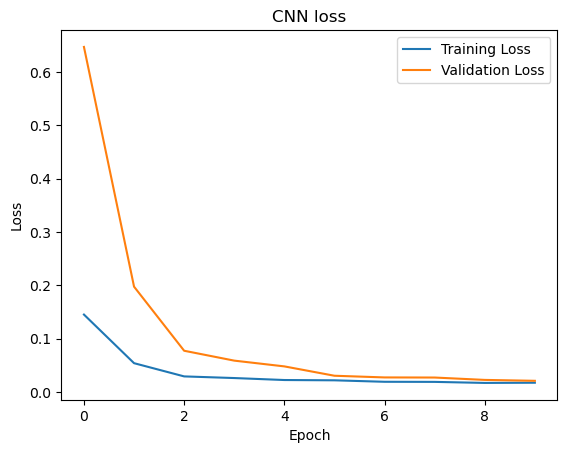

In [29]:
loss_values_CNN = history_CNN.history['loss']
val_loss_CNN = history_CNN.history['val_loss']
plt.plot(loss_values_CNN, label= 'Training Loss')
plt.plot(val_loss_CNN, label= 'Validation Loss')
plt.title('CNN loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show(block=True)

### Predicting using CNN

In [30]:
scaled_merged_df_CNN = scaled_merged_df.copy()
scaled_merged_df_CNN['Close_y'] = model_GRU.predict(scaled_merged_df_CNN)[:, 0]
Predict_CNN = scaler.inverse_transform(scaled_merged_df_CNN)
Predict_CNN = pd.DataFrame(Predict_CNN, columns=scaled_merged_df.columns)
Predict_CNN = Predict_CNN['Close_y']

143/143 [==============================] - 1s 5ms/step


### CNN Prediction & Actual Visualization

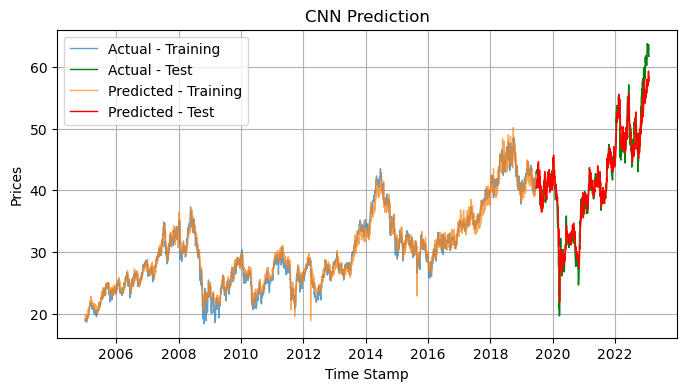

In [31]:
plt.figure(figsize=(8, 4))

plt.plot(merged_df.index, merged_df['Close_y'], label="Actual - Training", linewidth=1, alpha=0.7)
plt.plot(merged_df.index[-909:], merged_df['Close_y'][-909:], label="Actual - Test", color='green', linewidth=1)

plt.plot(merged_df.index, Predict_CNN, label="Predicted - Training", linewidth=1, alpha=0.7)
plt.plot(merged_df.index[-909:], Predict_CNN[-909:], label="Predicted - Test", color='red', linewidth=1)



plt.title('CNN Prediction')
plt.xlabel('Time Stamp')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)

mplcursors.cursor(hover=False)

plt.show()

# Temporal Convolutional Network (TCN)

### Designing a TCN Model

We've created and configured a TCN (Temporal Convolutional Network) model with two TCN layers for stock price prediction. The TCN is a type of neural network architecture that utilizes dilated convolutions, which allow the network to have a large receptive field without increasing the number of parameters. The TCN has been shown to be effective in modeling sequential data and has been used for various applications, including language modeling and speech recognition.

In this function, the TCN model has one TCN layer with 64 filters, a kernel size of 2, and ReLU activation. The dilations are set to [1, 2, 4, 8], which means that the network can capture patterns with different lengths. The padding is set to 'causal', which ensures that the network can only use past information to make predictions. The dropout rate is set to 0.4 to prevent overfitting, and the model returns sequences. The output layer is a dense layer with one unit.

Given input sequence ${x_1, x_2, ..., x_t}$ and a Temporal Convolutional Network (TCN) model with multiple TCN layers, the TCN computes the following for each layer $l$:

1. Temporal Convolutional Layer: Applies a 1D convolution operation on the input, which consists of applying a set of filters (kernels) to the input to extract local features. The output is called a feature map. Each filter has a width (kernel_size), a specified number of filters (nb_filters), and a dilation factor (dilations). The TCN layer also supports skip connections and dropout for regularization.

$$
\quad F_{lj} = \sum_{i=1}^{k} x_{li} \cdot w_{lij} + b_{lj}, \quad \text{for } j = 1, 2, \dots, n_l,
$$

Where $x_{li}$ is the input value at position $i$ in layer $l$, $w_{lij}$ is the weight associated with position $i$ in filter $j$, $b_{lj}$ is the bias term for filter $j$, and $n_l$ is the number of filters in layer $l$.

2. Activation function (ReLU): The Rectified Linear Unit (ReLU) activation function is applied to the output of the TCN layer.

$$
\quad R(x) = \max(0, x),
$$

Where $x$ is the input value.

3. Dropout: A regularization technique that helps prevent overfitting. During training, the dropout layer randomly sets a fraction of input units to 0 at each update.

4. Dense output layer: The final fully connected layer that combines the features learned by the previous layers and produces the output prediction.

$$
\quad y = \sum_{i=1}^{m} x_i \cdot w_i + b,
$$

Where $x_i$ is the input value at position $i$, $w_i$ is the weight associated with position $i$, $b$ is the bias term, and $m$ is the number of input values.

In [32]:
def TCN_model():
    """
    Create and configure a TCN model with two TCN layers for stock price prediction.

    :return: The configured TCN model (keras.Sequential)
    """

    model = Sequential()

    model.add(TCN(input_shape=(15, 1),
                  nb_filters=32,
                  kernel_size=2,
                  dilations=[1, 2, 4, 8],
                  nb_stacks=1,
                  activation='relu',
                  padding='causal',
                  use_skip_connections=True,
                  dropout_rate=0.4,
                  return_sequences=True))

    model.add(Dense(units=1))

    return model

In [33]:
model_TCN = TCN_model()
model_TCN.summary()

optimizer_TCN = tf.keras.optimizers.Adam(learning_rate=0.001)

model_TCN.compile(
    optimizer=optimizer_TCN,
    loss='mean_squared_error'
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn (TCN)                   (None, 15, 32)            14720     
                                                                 
 dense_3 (Dense)             (None, 15, 1)             33        
                                                                 
Total params: 14,753
Trainable params: 14,753
Non-trainable params: 0
_________________________________________________________________


### Training the TCN Model

In [34]:
history_TCN = model_TCN.fit(X_train1, Y_train1, epochs=13, batch_size=30, 
                    validation_data=(X_val1, Y_val1), 
                    use_multiprocessing=True,
                   callbacks=[early_stopping])

Epoch 1/13
110/110 [==============================] - 2s 8ms/step - loss: 6.5264 - val_loss: 0.6062
Epoch 2/13
110/110 [==============================] - 1s 5ms/step - loss: 1.0553 - val_loss: 0.7109
Epoch 3/13
110/110 [==============================] - 1s 5ms/step - loss: 0.5973 - val_loss: 0.7681
Epoch 4/13
110/110 [==============================] - 1s 5ms/step - loss: 0.3977 - val_loss: 0.8761
Epoch 5/13
110/110 [==============================] - 1s 6ms/step - loss: 0.3133 - val_loss: 0.9003
Epoch 6/13
110/110 [==============================] - 1s 5ms/step - loss: 0.2638 - val_loss: 0.9080
Epoch 7/13
110/110 [==============================] - 1s 6ms/step - loss: 0.2294 - val_loss: 0.9460
Epoch 8/13
110/110 [==============================] - 1s 6ms/step - loss: 0.1941 - val_loss: 0.9156
Epoch 9/13
110/110 [==============================] - 1s 6ms/step - loss: 0.1796 - val_loss: 0.9354
Epoch 10/13
110/110 [==============================] - 1s 6ms/step - loss: 0.1665 - val_loss: 0.9683

### Ploting the Loss Function

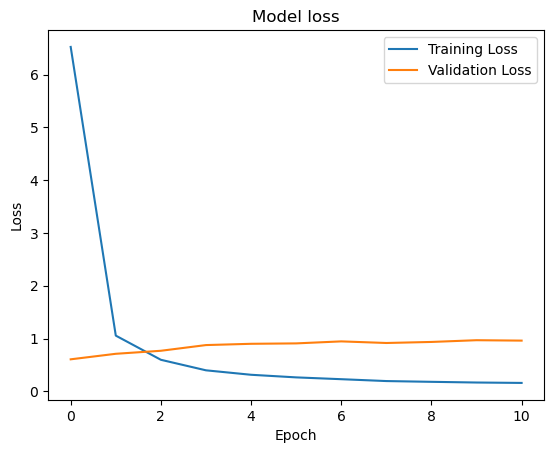

In [35]:
loss_values_TCN = history_TCN.history['loss']
val_loss_TCN = history_TCN.history['val_loss']
plt.plot(loss_values_TCN, label= 'Training Loss')
plt.plot(val_loss_TCN, label= 'Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show(block=True)

### Predicting using TCN

In [36]:
scaled_merged_df_TCN = scaled_merged_df.copy()
scaled_merged_df_TCN['Close_y'] = model_GRU.predict(scaled_merged_df_TCN)[:, 0]
Predict_TCN = scaler.inverse_transform(scaled_merged_df_TCN)
Predict_TCN = pd.DataFrame(Predict_TCN, columns=scaled_merged_df.columns)
Predict_TCN = Predict_TCN['Close_y']

143/143 [==============================] - 1s 5ms/step


### TCN Prediction & Actual Visualization

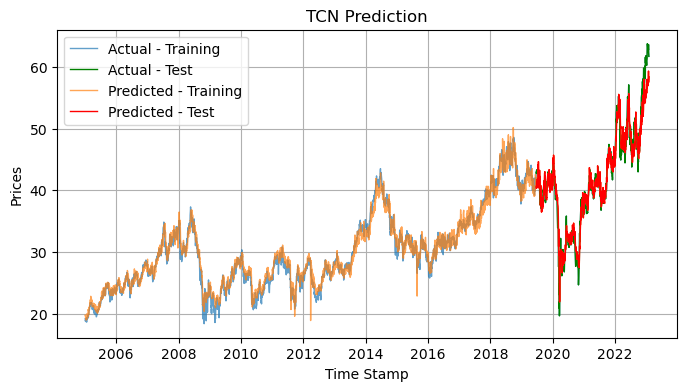

In [37]:
plt.figure(figsize=(8, 4))

plt.plot(merged_df.index, merged_df['Close_y'], label="Actual - Training", linewidth=1, alpha=0.7)
plt.plot(merged_df.index[-909:], merged_df['Close_y'][-909:], label="Actual - Test", color='green', linewidth=1)

plt.plot(merged_df.index, Predict_TCN, label="Predicted - Training", linewidth=1, alpha=0.7)
plt.plot(merged_df.index[-909:], Predict_TCN[-909:], label="Predicted - Test", color='red', linewidth=1)



plt.title('TCN Prediction')
plt.xlabel('Time Stamp')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)

mplcursors.cursor(hover=False)

plt.show()

# Auto Encoder - Decoder RNN (AER) Model

### Designing a AER Model

The `AER_model()` function creates and configures an Encoder-Decoder LSTM model for stock price prediction. This model is a type of Recurrent Neural Network (RNN) that consists of two main parts: the encoder and the decoder. The encoder part takes the input time series data and compresses it into a single vector (or hidden state). The Encoder part of the model is added using SimpleRNN. It consists of a SimpleRNN layer with the specified number of units. The `return_sequences` parameter is set to `False` to indicate that only the final output of the SimpleRNN layer is returned by the encoder. Dropout is applied to prevent overfitting. The output of the encoder is repeated multiple times to match the length of the decoder. The length 150 is an arbitrary value and can be adjusted based on the desired length of the decoder input. The Decoder part of the model is added using another SimpleRNN layer with the specified number of units. The return_sequences parameter is set to True to return sequences from the decoder. Dropout is applied to prevent overfitting. A `TimeDistributed` Dense layer is added to apply a Dense transformation to each time step of the decoder output.

Given an input sequence $\mathbf{X} = [\mathbf{x}_1, \mathbf{x}_2, ..., \mathbf{x}_T]$ and a SimpleRNN layer with $n$ hidden units, the Encoder-Decoder SimpleRNN computes the following for each time step $t$:

Encoder: The Encoder takes the input sequence and generates a hidden state $\mathbf{h}_t$ which contains information about the input sequence up to time step $t$. This is done using a SimpleRNN layer.

The hidden state at time $t$ is calculated as:

$$
\mathbf{h}_t = \text{tanh}(\mathbf{W}_{hh}\mathbf{h}_{t-1} + \mathbf{W}_{xh}\mathbf{x}_t + \mathbf{b}_h),
$$

where $\mathbf{W}{hh}$ and $\mathbf{W}{xh}$ are weight matrices, $\mathbf{b}_h$ is a bias vector, and $\text{tanh}$ is the hyperbolic tangent activation function.

Dropout is then applied to the hidden state, which randomly sets a fraction of the hidden state values to zero with a probability of 0.4. Dropout helps prevent overfitting.

The final hidden state $\mathbf{h}_T$ of the encoder is then used as the input for the decoder.

RepeatVector Layer: The RepeatVector layer repeats the final hidden state $\mathbf{h}_T$ of the encoder for a specific number of times (150 in this case) to match the length of the output sequence.

Decoder: The Decoder generates the output sequence from the repeated hidden state. It also uses a SimpleRNN layer, and the hidden state at each time step is calculated similarly to the encoder. The difference is that the initial hidden state of the decoder is the repeated hidden state from the encoder.

The hidden state at time $t$ is calculated as:

$$
\mathbf{h}_t = \text{tanh}(\mathbf{W}_{hh}\mathbf{h}_{t-1} + \mathbf{W}_{xh}\mathbf{x}_t + \mathbf{b}_h),
$$

Dropout is also applied to the hidden state of the decoder.

The output at each time step is then calculated as:

$$
\mathbf{o}_t = \mathbf{W}_{ho}\mathbf{h}_t + \mathbf{b}_o,
$$

where $\mathbf{W}_{ho}$ is a weight matrix, $\mathbf{b}_o$ is a bias vector, and $\mathbf{o}_t$ is the output at time $t$.

The TimeDistributed wrapper is used to apply the Dense layer to every temporal slice of the input. That is, it applies the Dense layer to each of the 150 time steps of the output sequence. The Dense layer has a single unit and transforms the RNN outputs to the final output sequence.

The final output of the model is a sequence $\mathbf{O} = [\mathbf{o}_1, \mathbf{o}2, ..., \mathbf{o}{150}]$.

In [38]:
def AER_model(input_shape=(15, 1), rnn_units=64, dense_units=1):
    """
    Create and configure an Encoder-Decoder SimpleRNN model for stock price prediction.

    :return: The configured Encoder-Decoder SimpleRNN model (keras.Sequential)
    """

    model = Sequential()

    # Encoder
    model.add(SimpleRNN(units=rnn_units, input_shape=input_shape, return_sequences=False))
    model.add(Dropout(0.4))
    
    model.add(RepeatVector(150))

    # Decoder
    model.add(SimpleRNN(units=rnn_units, return_sequences=True))
    model.add(Dropout(0.4))
    model.add(TimeDistributed(Dense(units=dense_units)))
    
    return model

In [39]:
model_AER = AER_model()
model_AER.summary()

optimizer_AER = tf.keras.optimizers.Adam(learning_rate=0.00075)

model_AER.compile(
    optimizer=optimizer_AER,
    loss='mean_squared_error'
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 repeat_vector (RepeatVector  (None, 150, 64)          0         
 )                                                               
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 150, 64)           8256      
                                                                 
 dropout_12 (Dropout)        (None, 150, 64)           0         
                                                                 
 time_distributed (TimeDistr  (None, 150, 1)           65        
 ibuted)                                              

### Training the AER Model

In [40]:
history_AER = model_AER.fit(X_train1, Y_train1, epochs=10, batch_size=150, 
                    validation_data=(X_val1, Y_val1), 
                    use_multiprocessing=True,
                   callbacks=[early_stopping])

Epoch 1/10
22/22 [==============================] - 3s 77ms/step - loss: 0.3170 - val_loss: 0.1486
Epoch 2/10
22/22 [==============================] - 2s 82ms/step - loss: 0.0829 - val_loss: 0.0802
Epoch 3/10
22/22 [==============================] - 2s 75ms/step - loss: 0.0430 - val_loss: 0.0505
Epoch 4/10
22/22 [==============================] - 2s 69ms/step - loss: 0.0316 - val_loss: 0.0467
Epoch 5/10
22/22 [==============================] - 2s 70ms/step - loss: 0.0261 - val_loss: 0.0387
Epoch 6/10
22/22 [==============================] - 1s 66ms/step - loss: 0.0231 - val_loss: 0.0256
Epoch 7/10
22/22 [==============================] - 2s 78ms/step - loss: 0.0206 - val_loss: 0.0326
Epoch 8/10
22/22 [==============================] - 2s 73ms/step - loss: 0.0192 - val_loss: 0.0363
Epoch 9/10
22/22 [==============================] - 1s 65ms/step - loss: 0.0176 - val_loss: 0.0279
Epoch 10/10
22/22 [==============================] - 2s 70ms/step - loss: 0.0168 - val_loss: 0.0245


### Plotting the Loss Function:

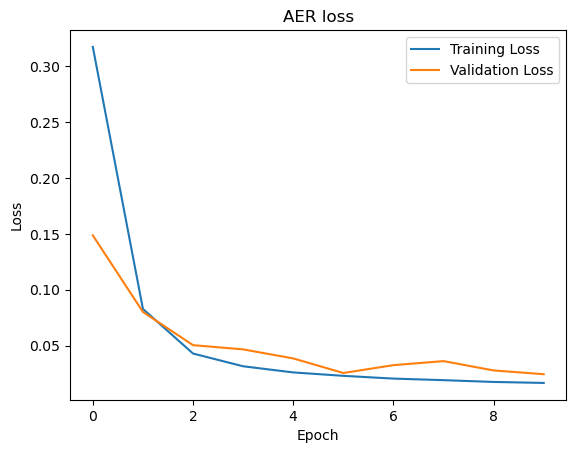

In [41]:
loss_values_AER = history_AER.history['loss']
val_loss_AER = history_AER.history['val_loss']
plt.plot(loss_values_AER, label= 'Training Loss')
plt.plot(val_loss_AER, label= 'Validation Loss')
plt.title('AER loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show(block=True)

### Predicting using AER

In [42]:
scaled_merged_df_AER = scaled_merged_df.copy()
scaled_merged_df_AER['Close_y'] = model_AER.predict(scaled_merged_df_AER)[:, 0]
Predict_AER = scaler.inverse_transform(scaled_merged_df_AER)
Predict_AER = pd.DataFrame(Predict_AER, columns=scaled_merged_df.columns)
Predict_AER = Predict_AER['Close_y']

143/143 [==============================] - 1s 8ms/step


### AER Prediction & Actual Visualization

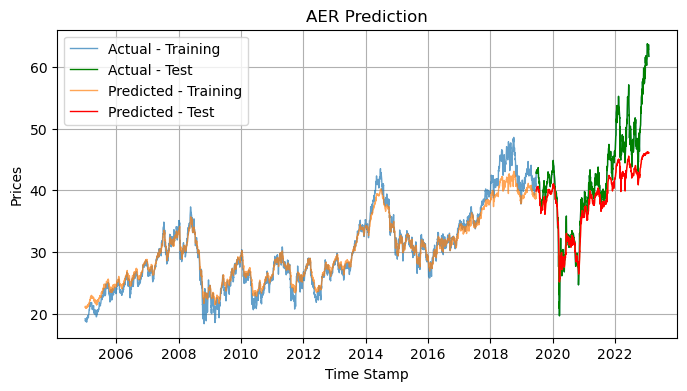

In [43]:
plt.figure(figsize=(8, 4))

plt.plot(merged_df.index, merged_df['Close_y'], label="Actual - Training", linewidth=1, alpha=0.7)
plt.plot(merged_df.index[-909:], merged_df['Close_y'][-909:], label="Actual - Test", color='green', linewidth=1)

plt.plot(merged_df.index, Predict_AER, label="Predicted - Training", linewidth=1, alpha=0.7)
plt.plot(merged_df.index[-909:], Predict_AER[-909:], label="Predicted - Test", color='red', linewidth=1)



plt.title('AER Prediction')
plt.xlabel('Time Stamp')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)

mplcursors.cursor(hover=False)

plt.show()

# Sequence-to-Sequence (seq2seq) model

### Designing a Seq2Seq Model
The `seq2seq_model()` function creates and configures a sequence-to-sequence model for stock price prediction using an encoder-decoder architecture. This type of model is particularly useful for predicting time series data, as it is able to handle variable-length input and output sequences, and is able to capture temporal dependencies in the data. The encoder takes in the input shape (15, 1) and uses an LSTM layer with a specified number of units (`lstm_units`) to create a hidden state representation of the input sequence. The encoder returns the final hidden and cell states as a list of tensors (`encoder_states`). The decoder takes in the input shape (15, 1) as well and uses another LSTM layer with the same number of units as the encoder. It also uses the `encoder_states` from the encoder as its initial state. The decoder outputs are passed through a Dense layer with a single unit to produce the final prediction for the target variable. Finally, the seq2seq model is created using the encoder and decoder inputs and outputs, and is returned.

Given input sequence ${x_1, x_2, ..., x_t}$ and a Seq2Seq LSTM model with $n$ hidden units, the model computes the following:

1. Encoder LSTM layer: The encoder LSTM processes the input sequence and generates a hidden state representation of the input.

$$
\text{Encoder LSTM: } \quad h_t = \sigma_c(W_{xc} x_t + W_{hc} h_{t-1} + b_c), \quad c_t = f_t \odot c_{t-1} + i_t \odot h_t,
$$

where $\sigma_c$ is the cell activation function, $x_t$ is the input at time step $t$, $W_{xc}$ and $W_{hc}$ are the weight matrices, $b_c$ is the bias term, $f_t$ is the forget gate, $c_t$ is the cell state, and $i_t$ is the input gate.

2. Decoder LSTM layer: The decoder LSTM processes the input sequence and generates an output sequence using the hidden state representation from the encoder.

$$
\text{Decoder LSTM: } \quad h_t = \sigma_c(W_{xc} x_t + W_{hc} h_{t-1} + b_c), \quad c_t = f_t \odot c_{t-1} + i_t \odot h_t,
$$

where $\sigma_c$ is the cell activation function, $x_t$ is the input at time step $t$, $W_{xc}$ and $W_{hc}$ are the weight matrices, $b_c$ is the bias term, $f_t$ is the forget gate, $c_t$ is the cell state, and $i_t$ is the input gate.

3. Dense output layer: The final fully connected layer that combines the features learned by the previous layers and produces the output prediction.

$$
\text{Dense: } \quad y_t = \sum_{i=1}^{m} x_i \cdot w_i + b,
$$

where $x_i$ is the input value at position $i$, $w_i$ is the weight associated with position $i$, $b$ is the bias term, and $m$ is the number of input values.

In [44]:
def seq2seq_model(input_shape=(15, 1), lstm_units=25):
    # Encoder
    encoder_inputs = Input(shape=input_shape, name='encoder_input')
    encoder = LSTM(lstm_units, return_state=True, name='encoder_lstm')
    _, state_h, state_c = encoder(encoder_inputs)
    encoder_states = [state_h, state_c]

    # Decoder
    decoder_inputs = Input(shape=input_shape, name='decoder_input')
    decoder_lstm = LSTM(lstm_units, return_sequences=True, return_state=True, name='decoder_lstm')
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
    decoder_dense = Dense(1, name='decoder_dense')
    decoder_outputs = decoder_dense(decoder_outputs)

    # Seq2Seq Model
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    return model

In [45]:
model_seq2seq = seq2seq_model()
model_seq2seq.summary()

optimizer_seq2seq = tf.keras.optimizers.Adam(learning_rate=0.0002)

model_seq2seq.compile(
    optimizer=optimizer_seq2seq,
    loss='mean_squared_error'
)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 15, 1)]      0           []                               
                                                                                                  
 decoder_input (InputLayer)     [(None, 15, 1)]      0           []                               
                                                                                                  
 encoder_lstm (LSTM)            [(None, 25),         2700        ['encoder_input[0][0]']          
                                 (None, 25),                                                      
                                 (None, 25)]                                                      
                                                                                              

### Training the Seq2Seq Model

In [46]:
decoder_input_train = np.zeros_like(Y_train1)
decoder_input_train[:, 1:] = Y_train1[:, :-1]
decoder_input_val = np.zeros_like(Y_val1)
decoder_input_val[:, 1:] = Y_val1[:, :-1]

history_seq2seq = model_seq2seq.fit([X_train1, decoder_input_train], Y_train1, epochs=10, batch_size=60,
                                    validation_data=([X_val1, decoder_input_val], Y_val1),
                                    use_multiprocessing=True,
                                    callbacks=[early_stopping])

Epoch 1/10
55/55 [==============================] - 4s 22ms/step - loss: 0.1010 - val_loss: 0.4546
Epoch 2/10
55/55 [==============================] - 0s 6ms/step - loss: 0.0440 - val_loss: 0.2640
Epoch 3/10
55/55 [==============================] - 0s 7ms/step - loss: 0.0267 - val_loss: 0.1366
Epoch 4/10
55/55 [==============================] - 0s 7ms/step - loss: 0.0210 - val_loss: 0.0806
Epoch 5/10
55/55 [==============================] - 0s 7ms/step - loss: 0.0177 - val_loss: 0.0474
Epoch 6/10
55/55 [==============================] - 0s 6ms/step - loss: 0.0153 - val_loss: 0.0306
Epoch 7/10
55/55 [==============================] - 0s 6ms/step - loss: 0.0136 - val_loss: 0.0211
Epoch 8/10
55/55 [==============================] - 0s 6ms/step - loss: 0.0125 - val_loss: 0.0163
Epoch 9/10
55/55 [==============================] - 0s 6ms/step - loss: 0.0116 - val_loss: 0.0143
Epoch 10/10
55/55 [==============================] - 0s 6ms/step - loss: 0.0110 - val_loss: 0.0133


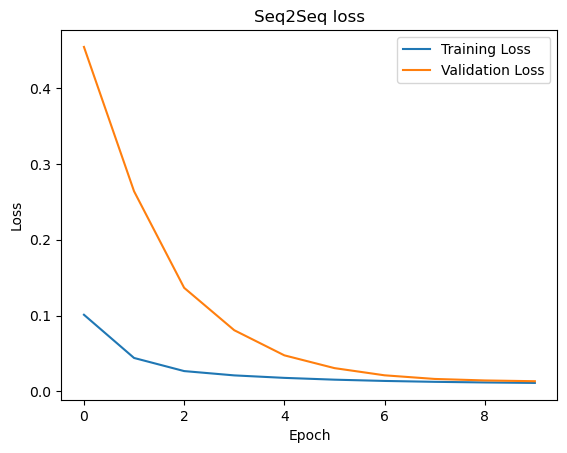

In [47]:
loss_values_seq2seq = history_seq2seq.history['loss']
val_loss_seq2seq = history_seq2seq.history['val_loss']
plt.plot(loss_values_seq2seq, label= 'Training Loss')
plt.plot(val_loss_seq2seq, label= 'Validation Loss')
plt.title('Seq2Seq loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show(block=True)

### Predicting using Seq2Seq

In [48]:
scaled_merged_df_seq2seq_expanded = np.expand_dims(scaled_merged_df, axis=-1)
decoder_input_pred = np.zeros((scaled_merged_df_seq2seq_expanded.shape[0], scaled_merged_df_seq2seq_expanded.shape[1], 1))

predicted_seq2seq = model_seq2seq.predict([scaled_merged_df_seq2seq_expanded, decoder_input_pred])

scaled_merged_df_seq2seq = scaled_merged_df.copy()
scaled_merged_df_seq2seq['Close_y'] = predicted_seq2seq[:, 0, 0]

Predict_seq2seq = scaler.inverse_transform(scaled_merged_df_seq2seq)
Predict_seq2seq = pd.DataFrame(Predict_seq2seq, columns=scaled_merged_df.columns)
Predict_seq2seq = Predict_seq2seq['Close_y']

143/143 [==============================] - 1s 3ms/step


### Seq2Seq Prediction & Actual Visualization

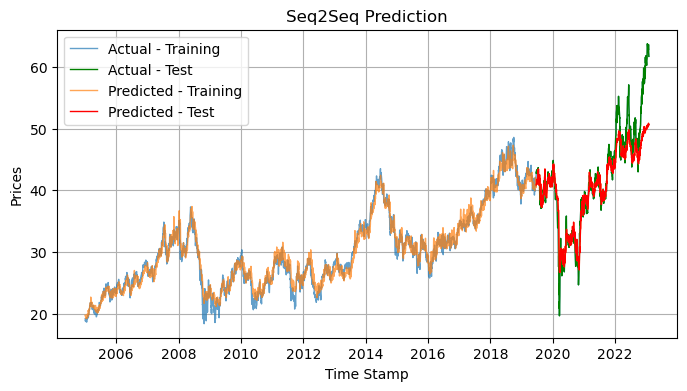

In [49]:
plt.figure(figsize=(8, 4))

plt.plot(merged_df.index, merged_df['Close_y'], label="Actual - Training", linewidth=1, alpha=0.7)
plt.plot(merged_df.index[-909:], merged_df['Close_y'][-909:], label="Actual - Test", color='green', linewidth=1)

plt.plot(merged_df.index, Predict_seq2seq, label="Predicted - Training", linewidth=1, alpha=0.7)
plt.plot(merged_df.index[-909:], Predict_seq2seq[-909:], label="Predicted - Test", color='red', linewidth=1)



plt.title('Seq2Seq Prediction')
plt.xlabel('Time Stamp')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)

mplcursors.cursor(hover=False)

plt.show()

# WaveNet (WN) model

### Designing the WaveNet (WN) Model
The `WaveNet_model()` function creates and configures a WaveNet model for time series data. WaveNet is a deep generative model that is known for its ability to model sequential data, such as time series. WaveNet models are known for their ability to capture long-term dependencies in sequential data and have been successfully applied to various tasks, including time series forecasting. The model consists of stacked dilated causal convolutional layers. The number of layers is specified by the `num_layers` variable, and the number of filters in each layer is specified by the `num_filters` variable. A loop is used to add each layer to the model. The dilation rate of each layer is set to 2 ** i, where i is the layer index. The padding parameter is set to 'causal', which ensures that the output at each time step only depends on the current and past inputs. The activation is set to 'relu' to introduce non-linearity. Dropout with a rate of 0.4 is added after each convolutional layer to prevent overfitting. After the convolutional layers, a Flatten layer is added to flatten the output tensor into a one-dimensional vector. Finally, a dense output layer with one unit is added to produce the final prediction for the target variable.

Given input sequence ${x_1, x_2, ..., x_t}$ and a WaveNet model with multiple Conv1D layers, the model computes the following for each layer $l$:

- Dilated causal convolution layer: Applies a 1D convolution operation on the input with a dilation rate that doubles for each layer, allowing the network to operate over longer ranges of the input as the depth increases. The output is called a feature map.

$$
\text{Conv1D layer } l: \quad F_{lj} = \sum_{i=1}^{k} x_{li} \cdot w_{lij} + b_{lj}, \quad \text{for } j = 1, 2, \dots, n_l,
$$

where $x_{li}$ is the input value at position $i$ in layer $l$, $w_{lij}$ is the weight associated with position $i$ in filter $j$, $b_{lj}$ is the bias term for filter $j$, and $n_l$ is the number of filters in layer $l$.

- Activation function (ReLU): The Rectified Linear Unit (ReLU) activation function is applied to the output of the Conv1D layer.

$$
\text{ReLU: } \quad R(x) = \max(0, x),
$$

where $x$ is the input value.

- Dropout layer: A regularization technique that helps prevent overfitting. During training, the dropout layer randomly sets a fraction of input units to 0 at each update.

- Flatten layer: This layer is used to convert the output of the last Conv1D layer into a one-dimensional array.

- Dense output layer: The final fully connected layer that combines the features learned by the previous layers and produces the output prediction.

$$
\text{Dense: } \quad y = \sum_{i=1}^{m} x_i \cdot w_i + b,
$$

where $x_i$ is the input value at position $i$, $w_i$ is the weight associated with position $i$, $b$ is the bias term, and $m$ is the number of input values.

In [50]:
def WaveNet_model(input_shape=(15, 1)):
    """
    Create and configure a WaveNet model for time series data.

    :param input_shape: tuple representing the input shape of the time series data.
    :return: The configured WaveNet model
    """

    # Initialize a sequential model
    model = models.Sequential()

    # Stack dilated causal convolution layers with increasing dilation rate
    num_layers = 2
    num_filters = 64

    for i in range(num_layers):
        dilation_rate = 2 ** i
        if i == 0:
            # For the first layer, specify the input_shape
            model.add(layers.Conv1D(filters=num_filters,
                                    kernel_size=2,
                                    dilation_rate=dilation_rate,
                                    padding='causal',
                                    activation='relu',
                                    input_shape=input_shape))
        else:
            # For subsequent layers, do not specify the input_shape
            model.add(layers.Conv1D(filters=num_filters,
                                    kernel_size=2,
                                    dilation_rate=dilation_rate,
                                    padding='causal',
                                    activation='relu'))

        # Dropout to prevent overfitting
        model.add(layers.Dropout(0.4))

    # Add a dense output layer with one unit
    model.add(layers.Flatten())
    model.add(layers.Dense(units=1))

    return model

In [51]:
model_WN = WaveNet_model()
model_WN.summary()

# Use a smaller learning rate
optimizer_WN = tf.keras.optimizers.Adam(learning_rate=0.001)

model_WN.compile(
    optimizer=optimizer_WN,
    loss='mean_squared_error'
)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 15, 64)            192       
                                                                 
 dropout_13 (Dropout)        (None, 15, 64)            0         
                                                                 
 conv1d_4 (Conv1D)           (None, 15, 64)            8256      
                                                                 
 dropout_14 (Dropout)        (None, 15, 64)            0         
                                                                 
 flatten_1 (Flatten)         (None, 960)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 961       
                                                                 
Total params: 9,409
Trainable params: 9,409
Non-traina

### Training the WN Model

In [52]:
history_WN = model_WN.fit(X_train1, Y_train1, epochs=10, batch_size=60, 
                    validation_data=(X_val1, Y_val1), 
                    use_multiprocessing=True,
                   callbacks=[early_stopping])

Epoch 1/10
55/55 [==============================] - 1s 7ms/step - loss: 0.0371 - val_loss: 0.0204
Epoch 2/10
55/55 [==============================] - 0s 5ms/step - loss: 0.0118 - val_loss: 0.0105
Epoch 3/10
55/55 [==============================] - 0s 6ms/step - loss: 0.0097 - val_loss: 0.0081
Epoch 4/10
55/55 [==============================] - 0s 6ms/step - loss: 0.0080 - val_loss: 0.0072
Epoch 5/10
55/55 [==============================] - 0s 6ms/step - loss: 0.0083 - val_loss: 0.0125
Epoch 6/10
55/55 [==============================] - 0s 7ms/step - loss: 0.0070 - val_loss: 0.0138
Epoch 7/10
55/55 [==============================] - 0s 4ms/step - loss: 0.0067 - val_loss: 0.0179
Epoch 8/10
55/55 [==============================] - 0s 6ms/step - loss: 0.0063 - val_loss: 0.0120
Epoch 9/10
55/55 [==============================] - 0s 7ms/step - loss: 0.0061 - val_loss: 0.0123
Epoch 10/10
55/55 [==============================] - 0s 5ms/step - loss: 0.0061 - val_loss: 0.0139


### Ploting Loss Function

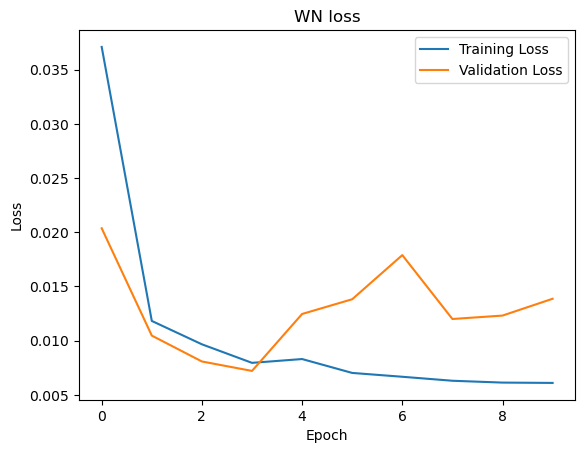

In [53]:
loss_values_WN = history_WN.history['loss']
val_loss_WN = history_WN.history['val_loss']
plt.plot(loss_values_WN, label= 'Training Loss')
plt.plot(val_loss_WN, label= 'Validation Loss')
plt.title('WN loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show(block=True)

### Predicting using WN Model

In [54]:
scaled_merged_df_WN = scaled_merged_df.copy()
scaled_merged_df_WN['Close_y'] = model_WN.predict(scaled_merged_df_WN)[:, 0]
Predict_WN = scaler.inverse_transform(scaled_merged_df_WN)
Predict_WN = pd.DataFrame(Predict_WN, columns=scaled_merged_df.columns)
Predict_WN = Predict_WN['Close_y']

143/143 [==============================] - 0s 2ms/step


### Plotting WN Predictions

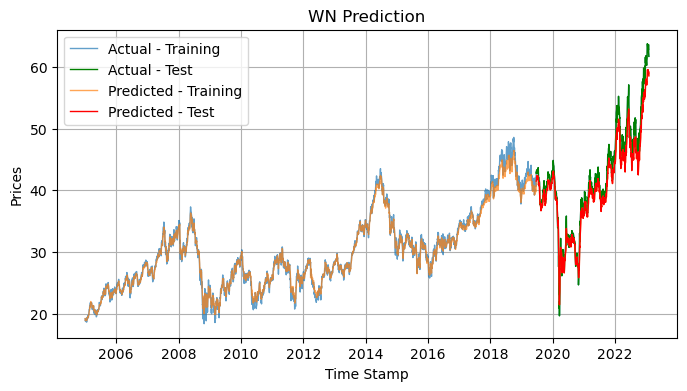

In [55]:
plt.figure(figsize=(8, 4))

plt.plot(merged_df.index, merged_df['Close_y'], label="Actual - Training", linewidth=1, alpha=0.7)
plt.plot(merged_df.index[-909:], merged_df['Close_y'][-909:], label="Actual - Test", color='green', linewidth=1)

plt.plot(merged_df.index, Predict_WN, label="Predicted - Training", linewidth=1, alpha=0.7)
plt.plot(merged_df.index[-909:], Predict_WN[-909:], label="Predicted - Test", color='red', linewidth=1)



plt.title('WN Prediction')
plt.xlabel('Time Stamp')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)

mplcursors.cursor(hover=False)

plt.show()

# Multi-Layer Perceptron (MLP) model

### Designing the MLP Model

The `MLP_model()` function creates and configures a Multi-Layer Perceptron (MLP) model for stock price prediction. MLPs are a type of feedforward neural network that consists of multiple layers of nodes (neurons) with non-linear activation functions. MLP models are commonly used for regression and classification tasks. In this case, the MLP model is designed for stock price prediction. The model consists of multiple dense (fully connected) layers. The input layer is added first with `Dense(units=50, activation='relu', input_shape=(15,))`. This layer has 50 units/neurons and uses the `ReLU` activation function. Dropout with a rate of 0.4 is added after each hidden layer using Dropout(0.4). Dropout is a regularization technique that randomly drops out a fraction of the input units during training, which helps prevent overfitting. The second, third, and fourth hidden layers are added with `Dense(units=50, activation='relu')`, each having 50 units/neurons and using the ReLU activation function. Finally, the output layer is added with Dense(units=1), which has a single unit representing the prediction for the target variable.

Given an input vector $\mathbf{x} = (x_1, x_2, ..., x_m)$ and a Multilayer Perceptron (MLP) model with multiple Dense layers, the MLP computes the following for each layer $l$:

- Dense layer: Applies a linear transformation to the input vector followed by an activation function. For each unit in the layer, it computes a weighted sum of the input values and adds a bias term, then applies the activation function to this sum.

$$
\text{Dense layer } l: \quad h_{lj} = \text{ReLU}\left(\sum_{i=1}^{m} x_{li} \cdot w_{lij} + b_{lj}\right), \quad \text{for } j = 1, 2, \dots, n_l,
$$

where $x_{li}$ is the input value at position $i$ in layer $l$, $w_{lij}$ is the weight associated with position $i$ in unit $j$, $b_{lj}$ is the bias term for unit $j$, and $n_l$ is the number of units in layer $l$.

- Activation function (ReLU): The Rectified Linear Unit (ReLU) activation function is applied to the output of the Dense layer.

$$
\text{ReLU: } \quad R(x) = \max(0, x),
$$

where $x$ is the input value.

- Dropout layer: A regularization technique that helps prevent overfitting. During training, the dropout layer randomly sets a fraction of input units to 0 at each update.

- Dense output layer: The final fully connected layer that combines the features learned by the previous layers and produces the output prediction. This layer does not have an activation function.

$$
\text{Dense: } \quad y = \sum_{i=1}^{m} x_i \cdot w_i + b,
$$

where $x_i$ is the input value at position $i$, $w_i$ is the weight associated with position $i$, $b$ is the bias term, and $m$ is the number of input values.

In [56]:
def MLP_model():
    """
    Create and configure an MLP model for stock price prediction.

    :return: The configured MLP model (keras.Sequential)
    """

    model = Sequential()

    model.add(Dense(units=50, activation='relu', input_shape=(15,)))
    model.add(Dropout(0.4))

    model.add(Dense(units=50, activation='relu'))
    model.add(Dropout(0.4))

    model.add(Dense(units=50, activation='relu'))
    model.add(Dropout(0.4))

    model.add(Dense(units=50, activation='relu'))
    model.add(Dropout(0.4))

    model.add(Dense(units=1))

    return model

In [57]:
model_MLP = MLP_model()
model_MLP.summary()

optimizer_MLP = tf.keras.optimizers.Adam(learning_rate=0.0002)

model_MLP.compile(
    optimizer=optimizer_MLP,
    loss='mean_squared_error'
)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                800       
                                                                 
 dropout_15 (Dropout)        (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dropout_16 (Dropout)        (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 50)                2550      
                                                                 
 dropout_17 (Dropout)        (None, 50)                0         
                                                                 
 dense_9 (Dense)             (None, 50)               

### Training the MLP Model

In [58]:
history_MLP = model_MLP.fit(X_train1, Y_train1, epochs=30, batch_size=60, 
                    validation_data=(X_val1, Y_val1), 
                    use_multiprocessing=True,
                   callbacks=[early_stopping])

Epoch 1/30
55/55 [==============================] - 1s 6ms/step - loss: 0.2108 - val_loss: 1.1307
Epoch 2/30
55/55 [==============================] - 0s 3ms/step - loss: 0.1632 - val_loss: 0.8731
Epoch 3/30
55/55 [==============================] - 0s 3ms/step - loss: 0.1377 - val_loss: 0.7351
Epoch 4/30
55/55 [==============================] - 0s 3ms/step - loss: 0.1242 - val_loss: 0.6443
Epoch 5/30
55/55 [==============================] - 0s 3ms/step - loss: 0.1065 - val_loss: 0.5344
Epoch 6/30
55/55 [==============================] - 0s 3ms/step - loss: 0.0956 - val_loss: 0.4125
Epoch 7/30
55/55 [==============================] - 0s 3ms/step - loss: 0.0860 - val_loss: 0.3450
Epoch 8/30
55/55 [==============================] - 0s 3ms/step - loss: 0.0808 - val_loss: 0.3212
Epoch 9/30
55/55 [==============================] - 0s 3ms/step - loss: 0.0788 - val_loss: 0.2953
Epoch 10/30
55/55 [==============================] - 0s 3ms/step - loss: 0.0700 - val_loss: 0.2381
Epoch 11/30
55/55 [

### Plotting the loss function

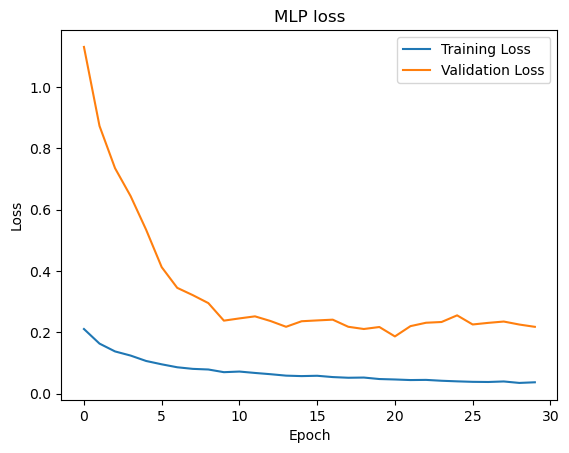

In [59]:
loss_values_MLP = history_MLP.history['loss']
val_loss_MLP = history_MLP.history['val_loss']
plt.plot(loss_values_MLP, label= 'Training Loss')
plt.plot(val_loss_MLP, label= 'Validation Loss')
plt.title('MLP loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show(block=True)

### Predicting using the MLP Model

In [60]:
scaled_merged_df_MLP = scaled_merged_df.copy()
scaled_merged_df_MLP['Close_y'] = model_MLP.predict(scaled_merged_df_MLP)[:, 0]
Predict_MLP = scaler.inverse_transform(scaled_merged_df_MLP)
Predict_MLP = pd.DataFrame(Predict_MLP, columns=scaled_merged_df.columns)
Predict_MLP = Predict_MLP['Close_y']

143/143 [==============================] - 0s 983us/step


### Ploting the MLP Predictions

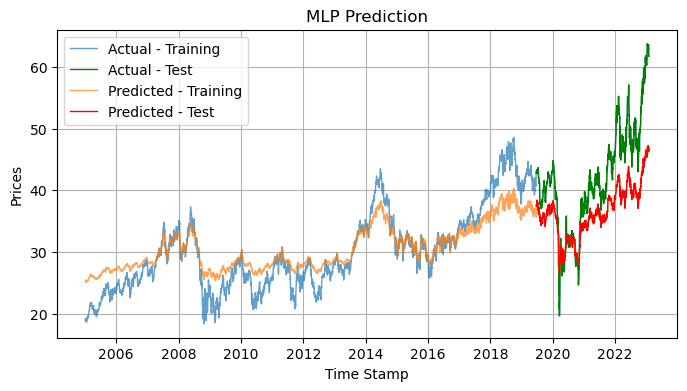

In [61]:
plt.figure(figsize=(8, 4))

plt.plot(merged_df.index, merged_df['Close_y'], label="Actual - Training", linewidth=1, alpha=0.7)
plt.plot(merged_df.index[-909:], merged_df['Close_y'][-909:], label="Actual - Test", color='green', linewidth=1)

plt.plot(merged_df.index, Predict_MLP, label="Predicted - Training", linewidth=1, alpha=0.7)
plt.plot(merged_df.index[-909:], Predict_MLP[-909:], label="Predicted - Test", color='red', linewidth=1)



plt.title('MLP Prediction')
plt.xlabel('Time Stamp')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)

mplcursors.cursor(hover=False)

plt.show()

### Comparing the Deep Learning models

%matplotlib notebook

<IPython.core.display.Javascript object>


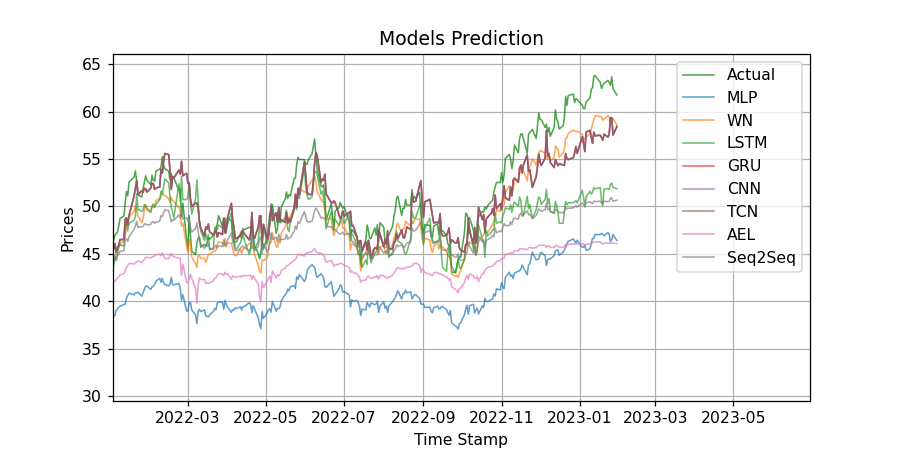

In [92]:
%matplotlib notebook
plt.figure(figsize=(8, 4))

plt.plot(merged_df.index, merged_df['Close_y'], label="Actual", color='green', linewidth=1, alpha=0.7)

plt.plot(merged_df.index, Predict_MLP, label="MLP", linewidth=1, alpha=0.7)
plt.plot(merged_df.index, Predict_WN, label="WN", linewidth=1, alpha=0.7)
plt.plot(merged_df.index, Predict_LSTM, label="LSTM", linewidth=1, alpha=0.7)
plt.plot(merged_df.index, Predict_GRU, label="GRU", linewidth=1, alpha=0.7)
plt.plot(merged_df.index, Predict_CNN, label="CNN", linewidth=1, alpha=0.7)
plt.plot(merged_df.index, Predict_TCN, label="TCN", linewidth=1, alpha=0.7)
plt.plot(merged_df.index, Predict_AER, label="AEL", linewidth=1, alpha=0.7)
plt.plot(merged_df.index, Predict_seq2seq, label="Seq2Seq", linewidth=1, alpha=0.7)



plt.title('Models Prediction')
plt.xlabel('Time Stamp')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)

mplcursors.cursor(hover=False)

plt.show()

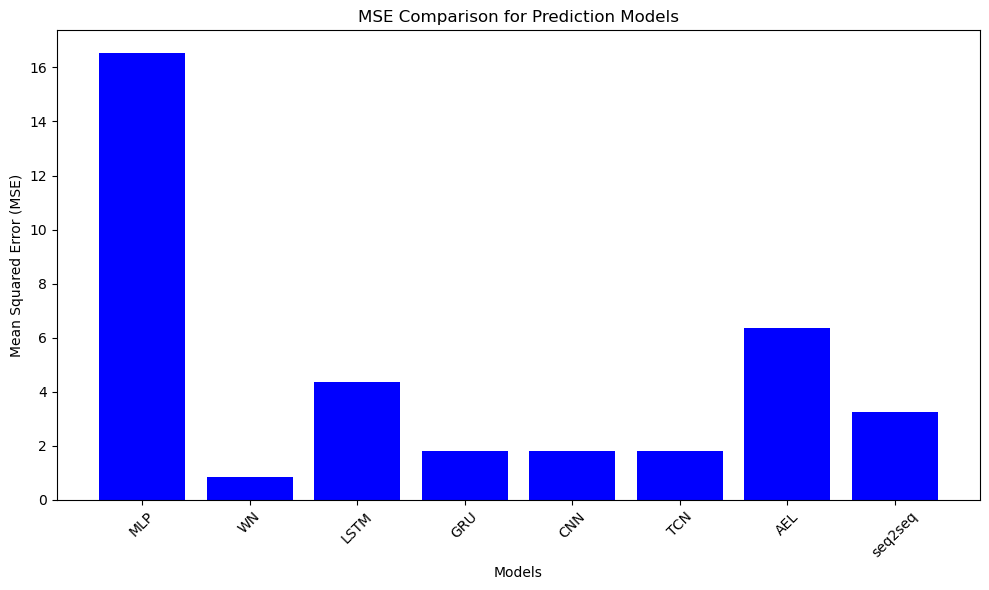

In [63]:
actual = merged_df['Close_y']
mse_MLP = mean_squared_error(actual, Predict_MLP)
mse_WN = mean_squared_error(actual, Predict_WN)
mse_LSTM = mean_squared_error(actual, Predict_LSTM)
mse_GRU = mean_squared_error(actual, Predict_GRU)
mse_CNN = mean_squared_error(actual, Predict_CNN)
mse_TCN = mean_squared_error(actual, Predict_TCN)
mse_AEL = mean_squared_error(actual, Predict_AER)
mse_seq2seq = mean_squared_error(actual, Predict_seq2seq)


models_name = ['MLP', 'WN', 'LSTM', 'GRU', 'CNN', 'TCN', 'AEL', 'seq2seq']
mse_values = [mse_MLP, mse_WN, mse_LSTM, mse_GRU, mse_CNN, mse_TCN, mse_AEL, mse_seq2seq]

plt.figure(figsize=(10, 6))
plt.bar(models_name, mse_values, color='blue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison for Prediction Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

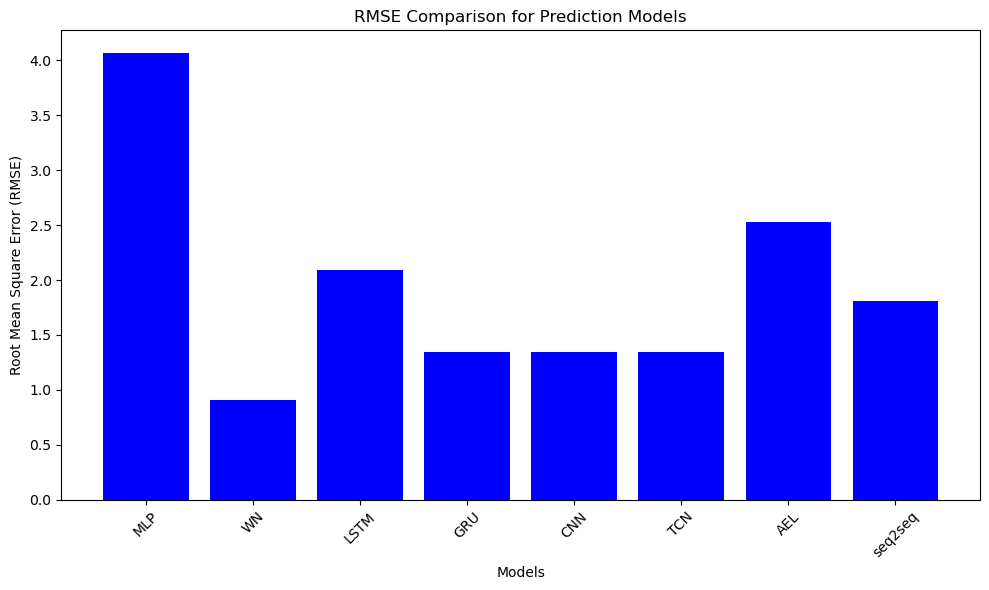

In [64]:
rmse_MLP = mean_squared_error(actual, Predict_MLP, squared=False)
rmse_WN = mean_squared_error(actual, Predict_WN, squared=False)
rmse_LSTM = mean_squared_error(actual, Predict_LSTM, squared=False)
rmse_GRU = mean_squared_error(actual, Predict_GRU, squared=False)
rmse_CNN = mean_squared_error(actual, Predict_CNN, squared=False)
rmse_TCN = mean_squared_error(actual, Predict_TCN, squared=False)
rmse_AEL = mean_squared_error(actual, Predict_AER, squared=False)
rmse_seq2seq = mean_squared_error(actual, Predict_seq2seq, squared=False)

rmse_values = [rmse_MLP, rmse_WN, rmse_LSTM, rmse_GRU, rmse_CNN, rmse_TCN, rmse_AEL, rmse_seq2seq]

plt.figure(figsize=(10, 6))
plt.bar(models_name, rmse_values, color='blue')
plt.xlabel('Models')
plt.ylabel('Root Mean Square Error (RMSE)')
plt.title('RMSE Comparison for Prediction Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Linear Regression (LR)

### Linear Regression (LR) Modification
The `train_linear_regression()` function trains a linear regression model to predict stock prices using the provided training data. The trained model is then used to generate predictions for the target variable. The MSE is calculated to evaluate the performance of the model on the validation set. We create a Linear Regression model using `model_LR = LinearRegression()`. The model is trained using the training data. The predicted values for the target variable (`Close_y`) are calculated using the trained linear regression model with `model_LR.predict(scaled_merged_df_LR.values)`. The mean squared error (MSE) is calculated by comparing the predicted values (`Predict_LR.values`) with the actual values.

Given a matrix of input vectors $\mathbf{X} = [\mathbf{x}_1, \mathbf{x}_2, ..., \mathbf{x}_n]$ and a corresponding vector of targets $\mathbf{y} = [y_1, y_2, ..., y_n]$, where each $\mathbf{x}_i$ is a feature vector and $y_i$ is the target value, the Linear Regression model computes the following:

Linear Regression model: The model learns a set of weights and a bias term to minimize the mean squared error (MSE) between the predicted and true target values.

The predicted value for each input vector $\mathbf{x}_i$ is computed as:

$$
\text{Prediction: } \quad \hat{y}_i = \mathbf{w}^T \mathbf{x}_i + b,
$$

where $\mathbf{w}$ is the weight vector, $\mathbf{x}_i$ is the $i$-th input vector, and $b$ is the bias term.

Mean Squared Error (MSE): The MSE is the average of the squared differences between the predicted and true target values.

The MSE is computed as:

$$
\text{MSE: } \quad \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2,
$$

where $n$ is the number of input vectors, $\hat{y}_i$ is the predicted target value for the $i$-th input vector, and $y_i$ is the true target value.

The goal of the Linear Regression model is to learn a set of weights and a bias term that minimize the MSE. After the model is trained, it can be used to make predictions on new data. The MSE on the validation set can be used to evaluate the model's performance.

In [65]:
def train_linear_regression(X_train1, Y_train1, scaled_merged_df):
    model_LR = LinearRegression()
    model_LR.fit(np.squeeze(X_train1), np.squeeze(Y_train1))

    scaled_merged_df_LR = scaled_merged_df.copy()
    scaled_merged_df_LR['Close_y'] = model_LR.predict(scaled_merged_df_LR.values)

    Predict_LR = scaler.inverse_transform(scaled_merged_df_LR)
    Predict_LR = pd.DataFrame(Predict_LR, columns=scaled_merged_df.columns)
    Predict_LR = Predict_LR['Close_y']

    mse = mean_squared_error(merged_df['Close_y'].values, Predict_LR.values)
    rmse = mean_squared_error(merged_df['Close_y'].values, Predict_LR.values, squared=False)

    print(f'Mean Squared Error on validation set: {mse}')
    
    return rmse, mse, Predict_LR, model_LR
rmse_LR, mse_LR, Predict_LR, model_LR = train_linear_regression(X_train1, Y_train1, scaled_merged_df)

Mean Squared Error on validation set: 0.01862005859095285


### Ploting the predictions of LR

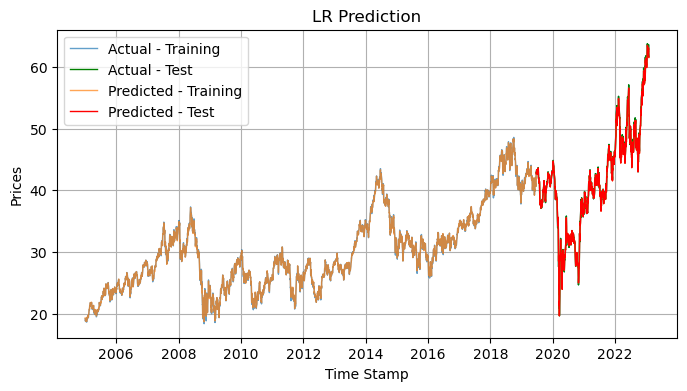

In [66]:
plt.figure(figsize=(8, 4))

plt.plot(merged_df.index, merged_df['Close_y'], label="Actual - Training", linewidth=1, alpha=0.7)
plt.plot(merged_df.index[-909:], merged_df['Close_y'][-909:], label="Actual - Test", color='green', linewidth=1)

plt.plot(merged_df.index, Predict_LR, label="Predicted - Training", linewidth=1, alpha=0.7)
plt.plot(merged_df.index[-909:], Predict_LR[-909:], label="Predicted - Test", color='red', linewidth=1)



plt.title('LR Prediction')
plt.xlabel('Time Stamp')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)

mplcursors.cursor(hover=False)

plt.show()

### Plotting the Features
The code extracts the coefficients or feature importance values from a linear regression model and creates a bar plot to visualize these values. The plot helps in understanding the relative importance of different features in the model's predictions.

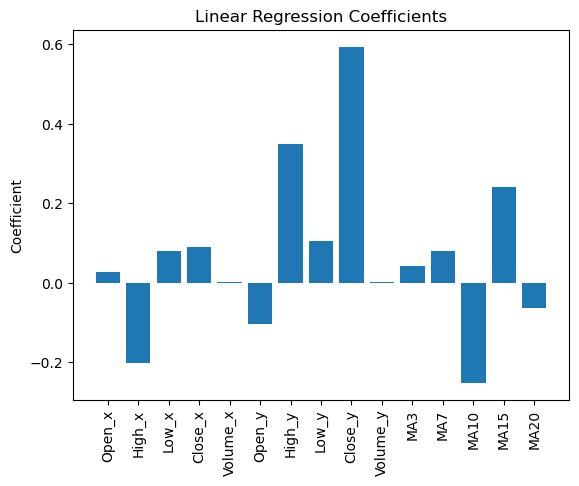

In [67]:
features = scaled_merged_df.columns

# Extract feature importance
importance_LR = model_LR.coef_

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a bar plot
ax.bar(features, importance_LR)

# Add labels and title
ax.set_ylabel('Coefficient')
ax.set_title('Linear Regression Coefficients')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

# Ridge Regression Model

### Ridge Regression Modification
The `train_ridge_regression()` function performs Ridge Regression with hyperparameter tuning using grid search to find the best alpha value. The trained model is then used to generate predictions for the target variable. The MSE is calculated to evaluate the performance of the model on the validation set. Hyperparameters for the ridge regression model are defined in the hyperparameters dictionary. In this case, the alpha parameter is set to a range of values. Grid search is performed to find the best hyperparameters for the ridge regression model. The model is fitted to the training data with `grid_search_Ridge.fit()`. The predicted values for the target variable (`Close_y`) are calculated using the trained ridge regression model. The mean squared error (MSE) is calculated by comparing the predicted values with the actual values.

Given a matrix of input vectors $\mathbf{X} = [\mathbf{x}_1, \mathbf{x}_2, ..., \mathbf{x}_n]$ and a corresponding vector of targets $\mathbf{y} = [y_1, y_2, ..., y_n]$, where each $\mathbf{x}_i$ is a feature vector and $y_i$ is the target value, the Ridge Regression model computes the following:

Ridge Regression model: The model learns a set of weights and a bias term to minimize the mean squared error (MSE) between the predicted and true target values, plus a penalty term that discourages large weights to prevent overfitting. The penalty term is controlled by a hyperparameter $\alpha$.

The predicted value for each input vector $\mathbf{x}_i$ is computed as:

$$
\text{Prediction: } \quad \hat{y}_i = \mathbf{w}^T \mathbf{x}_i + b,
$$

where $\mathbf{w}$ is the weight vector, $\mathbf{x}_i$ is the $i$-th input vector, and $b$ is the bias term.

Mean Squared Error (MSE): The MSE is the average of the squared differences between the predicted and true target values.

The MSE is computed as:

$$
\text{MSE: } \quad \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2,
$$

where $n$ is the number of input vectors, $\hat{y}_i$ is the predicted target value for the $i$-th input vector, and $y_i$ is the true target value.

The Ridge Regression model minimizes the following loss function:

$$
\text{Loss: } \quad \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2 + \alpha ||\mathbf{w}||^2,
$$

where $\alpha$ is the regularization strength and $||\mathbf{w}||^2$ is the L2 norm of the weight vector.

The hyperparameter $\alpha$ is tuned using cross-validation to find the value that minimizes the MSE on the validation set.

After the model is trained, it can be used to make predictions on new data. The MSE on the validation set can be used to evaluate the model's performance.

In [68]:
def train_ridge_regression(X_train1, Y_train1, scaled_merged_df):
    model_Ridge = Ridge()

    hyperparameters = {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
    }

    grid_search_Ridge = GridSearchCV(model_Ridge, hyperparameters, cv=5, scoring='neg_mean_squared_error')

    grid_search_Ridge.fit(np.squeeze(X_train1), np.squeeze(Y_train1))

    scaled_merged_df_Ridge = scaled_merged_df.copy()
    scaled_merged_df_Ridge['Close_y'] = grid_search_Ridge.predict(scaled_merged_df_Ridge.values)

    Predict_Ridge = scaler.inverse_transform(scaled_merged_df_Ridge)
    Predict_Ridge = pd.DataFrame(Predict_Ridge, columns=scaled_merged_df.columns)
    Predict_Ridge = Predict_Ridge['Close_y']

    mse = mean_squared_error(merged_df['Close_y'].values, Predict_Ridge.values)
    rmse = mean_squared_error(merged_df['Close_y'].values, Predict_Ridge.values, squared=False)

    print(f'Mean Squared Error on validation set: {mse}')

    return rmse, mse, Predict_Ridge, grid_search_Ridge
rmse_Ridge, mse_Ridge, Predict_Ridge, grid_search_Ridge = train_ridge_regression(X_train1, Y_train1, scaled_merged_df)

Mean Squared Error on validation set: 0.01875870027561054


### Ploting the Predictions of Ridge

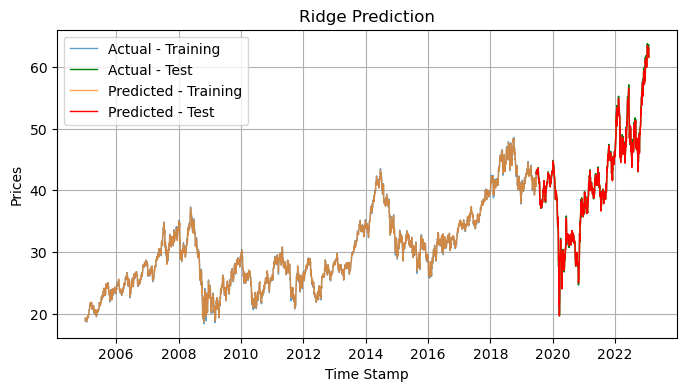

In [69]:
plt.figure(figsize=(8, 4))

plt.plot(merged_df.index, merged_df['Close_y'], label="Actual - Training", linewidth=1, alpha=0.7)
plt.plot(merged_df.index[-909:], merged_df['Close_y'][-909:], label="Actual - Test", color='green', linewidth=1)

plt.plot(merged_df.index, Predict_Ridge, label="Predicted - Training", linewidth=1, alpha=0.7)
plt.plot(merged_df.index[-909:], Predict_Ridge[-909:], label="Predicted - Test", color='red', linewidth=1)



plt.title('Ridge Prediction')
plt.xlabel('Time Stamp')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)

mplcursors.cursor(hover=False)

plt.show()

# Lasso Regression

### Lasso Regression Model Modification
The `train_lasso_regression()` function performs lasso regression with hyperparameter tuning using grid search to find the best alpha value. The trained model is then used to generate predictions for stock price prediction using the provided training data. The MSE is calculated to evaluate the performance of the model on the validation set. Hyperparameters for the lasso regression model are defined in the hyperparameters dictionary. In this case, the alpha parameter is set to a range of values. Grid search is performed to find the best hyperparameters for the lasso regression model using `GridSearchCV`.  The predicted values for the target variable (Close_y) are calculated using the trained lasso regression model. The mean squared error (MSE) is calculated by comparing the predicted values with the actual values.

Given a matrix of input vectors $\mathbf{X} = [\mathbf{x}_1, \mathbf{x}_2, ..., \mathbf{x}_n]$ and a corresponding vector of targets $\mathbf{y} = [y_1, y_2, ..., y_n]$, where each $\mathbf{x}_i$ is a feature vector and $y_i$ is the target value, the Lasso Regression model computes the following:

Lasso Regression model: The model learns a set of weights and a bias term to minimize the mean squared error (MSE) between the predicted and true target values, plus a penalty term that discourages large weights to prevent overfitting. The penalty term is controlled by a hyperparameter $\alpha$. A unique feature of Lasso Regression is that it can result in sparse models, where some weights are exactly zero, effectively excluding the corresponding features from the model.

The predicted value for each input vector $\mathbf{x}_i$ is computed as:

$$
\text{Prediction: } \quad \hat{y}_i = \mathbf{w}^T \mathbf{x}_i + b,
$$

where $\mathbf{w}$ is the weight vector, $\mathbf{x}_i$ is the $i$-th input vector, and $b$ is the bias term.

Mean Squared Error (MSE): The MSE is the average of the squared differences between the predicted and true target values.

The MSE is computed as:

$$
\text{MSE: } \quad \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2,
$$

where $n$ is the number of input vectors, $\hat{y}_i$ is the predicted target value for the $i$-th input vector, and $y_i$ is the true target value.

The Lasso Regression model minimizes the following loss function:

$$
\text{Loss: } \quad \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2 + \alpha ||\mathbf{w}||_1,
$$

where $\alpha$ is the regularization strength and $||\mathbf{w}||_1$ is the L1 norm of the weight vector.

The hyperparameter $\alpha$ is tuned using cross-validation to find the value that minimizes the MSE on the validation set.

In [70]:
def train_lasso_regression(X_train1, Y_train1, scaled_merged_df):
    model_Lasso = Lasso()

    hyperparameters = {
        'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
    }

    grid_search_Lasso = GridSearchCV(model_Lasso, hyperparameters, cv=5, scoring='neg_mean_squared_error')

    grid_search_Lasso.fit(np.squeeze(X_train1), np.squeeze(Y_train1))

    scaled_merged_df_Lasso = scaled_merged_df.copy()
    scaled_merged_df_Lasso['Close_y'] = grid_search_Lasso.predict(scaled_merged_df_Lasso.values)

    Predict_Lasso = scaler.inverse_transform(scaled_merged_df_Lasso)
    Predict_Lasso = pd.DataFrame(Predict_Lasso, columns=scaled_merged_df.columns)
    Predict_Lasso = Predict_Lasso['Close_y']

    mse = mean_squared_error(merged_df['Close_y'].values, Predict_Lasso.values)
    rmse = mean_squared_error(merged_df['Close_y'].values, Predict_Lasso.values, squared=False)

    print(f'Mean Squared Error on validation set: {mse}')

    return rmse, mse, Predict_Lasso, grid_search_Lasso
rmse_Lasso, mse_Lasso, Predict_Lasso, grid_search_Lasso = train_lasso_regression(X_train1, Y_train1, scaled_merged_df)

Mean Squared Error on validation set: 0.024781837522197897


### Ploting the Lasso Predictions

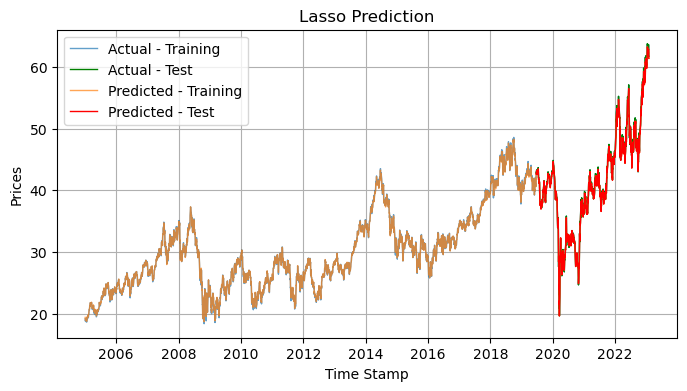

In [71]:
plt.figure(figsize=(8, 4))

plt.plot(merged_df.index, merged_df['Close_y'], label="Actual - Training", linewidth=1, alpha=0.7)
plt.plot(merged_df.index[-909:], merged_df['Close_y'][-909:], label="Actual - Test", color='green', linewidth=1)

plt.plot(merged_df.index, Predict_Lasso, label="Predicted - Training", linewidth=1, alpha=0.7)
plt.plot(merged_df.index[-909:], Predict_Lasso[-909:], label="Predicted - Test", color='red', linewidth=1)



plt.title('Lasso Prediction')
plt.xlabel('Time Stamp')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)

mplcursors.cursor(hover=False)

plt.show()

# Decision Tree Regression (DTR) model

### Decision Tree Regression (DTR) Model Modification
The `train_decision_tree_regression()` function trains a decision tree regression model for stock price prediction using the provided training data. Hyperparameters for the decision tree regression model are defined in the hyperparameters dictionary. The `max_depth`, `min_samples_split`, and `min_samples_leaf` parameters are set to different values to be tuned. Grid search is performed to find the best hyperparameters for the decision tree regression model using GridSearchCV. The model is fitted to the training data with `grid_search_DTR.fit()`. The predicted values for the target variable (`Close_y`) are calculated using the trained decision tree regression model. The mean squared error (MSE) is calculated by comparing the predicted values with the actual values.

Given a matrix of input vectors $\mathbf{X}_{\text{train1}} = [\mathbf{x}_1, \mathbf{x}_2, ..., \mathbf{x}n]$ and a corresponding vector of targets $\mathbf{Y}{\text{train1}} = [y_1, y_2, ..., y_n]$, where each $\mathbf{x}_i$ is a feature vector and $y_i$ is the target value, the Decision Tree Regression model computes the following:

Decision Tree Regression model: The model learns a set of rules to predict the target value. Each rule is a decision node in the tree, which splits the data based on a feature value. This process continues recursively until a stopping condition is met (e.g., the maximum depth of the tree is reached), and each final node (or "leaf") of the tree makes a prediction.

The predicted value for each input vector $\mathbf{x}_i$ is computed as the average target value of the training examples that reach the same leaf.

Hyperparameters: These are parameters that are not learned from the data but are set prior to training. They include:

max_depth: The maximum depth of the tree. Deeper trees can model more complex relationships, but are also more prone to overfitting.
min_samples_split: The minimum number of samples required to split an internal node.
min_samples_leaf: The minimum number of samples required to be at a leaf node.
The hyperparameters are tuned using cross-validation to find the values that minimize the mean squared error (MSE) on the validation set.

Mean Squared Error (MSE): The MSE is the average of the squared differences between the predicted and true target values. It is computed as:

$\text{MSE: } \quad \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2$,

where $n$ is the number of input vectors, $\hat{y}_i$ is the predicted target value for the $i$-th input vector, and $y_i$ is the true target value.

Root Mean Squared Error (RMSE): The RMSE is the square root of the MSE. It is in the same units as the target variable, which can make it more interpretable than the MSE. It is computed as:
$\text{RMSE: } \quad \sqrt{\frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2}$.

After the model is trained, it can be used to make predictions on new data. The MSE and RMSE on the validation set can be used to evaluate the model's performance. The function returns the RMSE, MSE, the predictions, and the trained model.

In [72]:
def train_decision_tree_regression(X_train1, Y_train1, scaled_merged_df):
    model_DTR = DecisionTreeRegressor()

    hyperparameters = {
        'max_depth': [2, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5, 10]
    }

    grid_search_DTR = GridSearchCV(model_DTR, hyperparameters, cv=5, scoring='neg_mean_squared_error')

    grid_search_DTR.fit(np.squeeze(X_train1), np.squeeze(Y_train1))

    scaled_merged_df_DTR = scaled_merged_df.copy()
    scaled_merged_df_DTR['Close_y'] = grid_search_DTR.predict(scaled_merged_df_DTR.values)

    Predict_DTR = scaler.inverse_transform(scaled_merged_df_DTR)
    Predict_DTR = pd.DataFrame(Predict_DTR, columns=scaled_merged_df.columns)
    Predict_DTR = Predict_DTR['Close_y']

    mse = mean_squared_error(merged_df['Close_y'].values, Predict_DTR.values)
    rmse = mean_squared_error(merged_df['Close_y'].values, Predict_DTR.values, squared=False)

    print(f'Mean Squared Error on validation set: {mse}')

    return rmse, mse, Predict_DTR, grid_search_DTR
rmse_DTR, mse_DTR, Predict_DTR, grid_search_DTR = train_decision_tree_regression(X_train1, Y_train1, scaled_merged_df)

Mean Squared Error on validation set: 8.421095838553597


### Ploting DTR Predictions

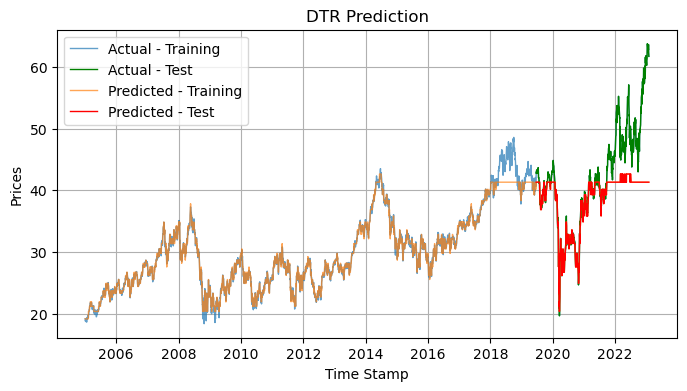

In [73]:
plt.figure(figsize=(8, 4))

plt.plot(merged_df.index, merged_df['Close_y'], label="Actual - Training", linewidth=1, alpha=0.7)
plt.plot(merged_df.index[-909:], merged_df['Close_y'][-909:], label="Actual - Test", color='green', linewidth=1)

plt.plot(merged_df.index, Predict_DTR, label="Predicted - Training", linewidth=1, alpha=0.7)
plt.plot(merged_df.index[-909:], Predict_DTR[-909:], label="Predicted - Test", color='red', linewidth=1)



plt.title('DTR Prediction')
plt.xlabel('Time Stamp')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)

mplcursors.cursor(hover=False)

plt.show()

# Bagging Regression (BAG) model

### Bagging Regression model Modification
The `train_bagging_regression()` function trains a bagging regression model for stock price prediction using the provided training data. The function creates a base estimator model for bagging regression using `DecisionTreeRegressor()`. Hyperparameters for the bagging regression model are defined in the hyperparameters dictionary. The `n_estimators`, `max_samples`, and `max_features` parameters are set to different values to be tuned. Grid search is performed to find the best hyperparameters for the bagging regression model using `GridSearchCV`. The predicted values for the target variable (`Close_y`) are calculated using the trained bagging regression model. The mean squared error (MSE) is calculated by comparing the predicted values with the actual values. 

Given a matrix of input vectors $\mathbf{X}_{\text{train1}} = [\mathbf{x}_1, \mathbf{x}_2, ..., \mathbf{x}n]$ and a corresponding vector of targets $\mathbf{Y}{\text{train1}} = [y_1, y_2, ..., y_n]$, where each $\mathbf{x}_i$ is a feature vector and $y_i$ is the target value, the Bagging Regressor model computes the following:

Bagging Regressor model: The Bagging Regressor is an ensemble model that trains a set of base estimators (in this case, Decision Trees) on random subsets of the original dataset, then aggregates their individual predictions to form a final prediction. By combining the predictions of multiple estimators, the Bagging Regressor aims to reduce the variance and avoid overfitting.

The predicted value for each input vector $\mathbf{x}_i$ is computed as the average of the predicted values from all base estimators.

Hyperparameters: These are parameters that are not learned from the data but are set prior to training. They include:

n_estimators: The number of base estimators in the ensemble.
max_samples: The number or fraction of samples to draw from the original dataset to train each base estimator.
max_features: The number or fraction of features to draw from the original dataset to train each base estimator.
The hyperparameters are tuned using cross-validation to find the values that minimize the mean squared error (MSE) on the validation set.

Mean Squared Error (MSE): The MSE is the average of the squared differences between the predicted and true target values. It is computed as:

$\text{MSE: } \quad \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2$,


where $n$ is the number of input vectors, $\hat{y}_i$ is the predicted target value for the $i$-th input vector, and $y_i$ is the true target value.

Root Mean Squared Error (RMSE): The RMSE is the square root of the MSE. It is in the same units as the target variable, which can make it more interpretable than the MSE. It is computed as:

$\text{RMSE: } \quad \sqrt{\frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2}$.

After the model is trained, it can be used to make predictions on new data. The MSE and RMSE on the validation set can be used to evaluate the model's performance. The function returns the RMSE, MSE, the predictions, and the trained model.

In [74]:
def train_bagging_regression(X_train1, Y_train1, scaled_merged_df):
    base_estimator = DecisionTreeRegressor()
    model_BAG = BaggingRegressor(base_estimator=base_estimator)

    hyperparameters = {
        'n_estimators': [10, 20, 30],
        'max_samples': [0.5, 1.0, 2.0],
        'max_features': [1.0, 2.0, 3.0]
    }

    grid_search_BAG = GridSearchCV(model_BAG, hyperparameters, cv=5, scoring='neg_mean_squared_error')

    grid_search_BAG.fit(np.squeeze(X_train1), np.squeeze(Y_train1))

    scaled_merged_df_BAG = scaled_merged_df.copy()
    scaled_merged_df_BAG['Close_y'] = grid_search_BAG.predict(scaled_merged_df_BAG.values)

    Predict_BAG = scaler.inverse_transform(scaled_merged_df_BAG)
    Predict_BAG = pd.DataFrame(Predict_BAG, columns=scaled_merged_df.columns)
    Predict_BAG = Predict_BAG['Close_y']

    mse = mean_squared_error(merged_df['Close_y'].values, Predict_BAG.values)
    rmse = mean_squared_error(merged_df['Close_y'].values, Predict_BAG.values, squared=False)

    print(f'Mean Squared Error on validation set: {mse}')

    return rmse, mse, Predict_BAG, grid_search_BAG
rmse_BAG, mse_BAG, Predict_BAG, grid_search_BAG = train_bagging_regression(X_train1, Y_train1, scaled_merged_df)

Mean Squared Error on validation set: 8.026489544856275


### Ploting BAG Predictions

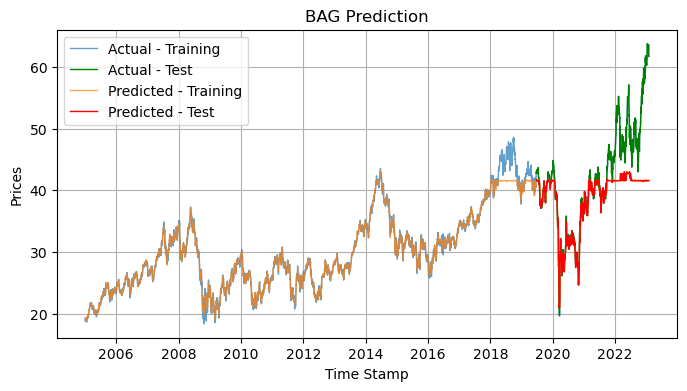

In [75]:
plt.figure(figsize=(8, 4))

plt.plot(merged_df.index, merged_df['Close_y'], label="Actual - Training", linewidth=1, alpha=0.7)
plt.plot(merged_df.index[-909:], merged_df['Close_y'][-909:], label="Actual - Test", color='green', linewidth=1)

plt.plot(merged_df.index, Predict_BAG, label="Predicted - Training", linewidth=1, alpha=0.7)
plt.plot(merged_df.index[-909:], Predict_BAG[-909:], label="Predicted - Test", color='red', linewidth=1)



plt.title('BAG Prediction')
plt.xlabel('Time Stamp')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)

mplcursors.cursor(hover=False)

plt.show()

# AdaBoost Regression (ADA) Model

### AdaBoost Regression (ADA) Model
The `train_adaboost_regression()` function trains an AdaBoost regression model for stock price prediction using the provided training data. The function creates a base estimator model for AdaBoost regression, `DecisionTreeRegressor()`. The AdaBoost regression model is created using `AdaBoostRegressor(base_estimator=base_estimator)`. Hyperparameters for the AdaBoost regression model are defined in the hyperparameters dictionary. The `n_estimators` and `learning_rate` parameters are set to different values to be tuned. Grid search is performed to find the best hyperparameters for the AdaBoost regression model using `GridSearchCV`. The model is fitted to the training data with grid_search_ADA.fit(). The predicted values for the target variable (`Close_y`) are calculated using the trained AdaBoost regression model. The mean squared error (MSE) is calculated by comparing the predicted values with the actual values.

Given a matrix of input vectors $\mathbf{X} = [\mathbf{x}_1, \mathbf{x}_2, ..., \mathbf{x}_n]$ and a corresponding vector of targets $\mathbf{y} = [y_1, y_2, ..., y_n]$, where each $\mathbf{x}_i$ is a feature vector and $y_i$ is the target value, the AdaBoost Regression model computes the following:

AdaBoost Regression model: The model is an ensemble method that combines several weak learners (in this case, Decision Tree Regressors) to form a strong learner. The model trains the weak learners iteratively, adjusting their weights according to their prediction errors. The final prediction is a weighted combination of the predictions of the weak learners.

Weak learner: A Decision Tree Regressor is used as the base estimator for the AdaBoost model. Given an input vector $\mathbf{x}_i$, a Decision Tree Regressor predicts the target value $\hat{y}_i$ by recursively splitting the feature space according to a set of learned decision rules.

Hyperparameters: The AdaBoost Regression model has two main hyperparameters:

`n_estimators`: The number of weak learners (Decision Tree Regressors) to train.
`learning_rate`: A factor that controls the contribution of each weak learner to the final prediction. A smaller learning rate results in a more conservative model, while a larger learning rate may lead to overfitting.
The hyperparameters are tuned using cross-validation to find the values that minimize the Mean Squared Error (MSE) on the validation set.

In [76]:
def train_adaboost_regression(X_train1, Y_train1, scaled_merged_df):
    base_estimator = DecisionTreeRegressor()
    model_ADA = AdaBoostRegressor(base_estimator=base_estimator)

    hyperparameters = {
        'n_estimators': [10, 20, 30],
        'learning_rate': [0.001, 0.01, 0.1]
    }

    grid_search_ADA = GridSearchCV(model_ADA, hyperparameters, cv=5, scoring='neg_mean_squared_error')

    grid_search_ADA.fit(np.squeeze(X_train1), np.squeeze(Y_train1))

    scaled_merged_df_ADA = scaled_merged_df.copy()
    scaled_merged_df_ADA['Close_y'] = grid_search_ADA.predict(scaled_merged_df_ADA.values)

    Predict_ADA = scaler.inverse_transform(scaled_merged_df_ADA)
    Predict_ADA = pd.DataFrame(Predict_ADA, columns=scaled_merged_df.columns)
    Predict_ADA = Predict_ADA['Close_y']

    mse = mean_squared_error(merged_df['Close_y'].values, Predict_ADA.values)
    rmse = mean_squared_error(merged_df['Close_y'].values, Predict_ADA.values, squared=False)

    print(f'Mean Squared Error on validation set: {mse}')

    return rmse, mse, Predict_ADA, grid_search_ADA
rmse_ADA, mse_ADA, Predict_ADA, grid_search_ADA = train_adaboost_regression(X_train1, Y_train1, scaled_merged_df)

Mean Squared Error on validation set: 8.449655268391687


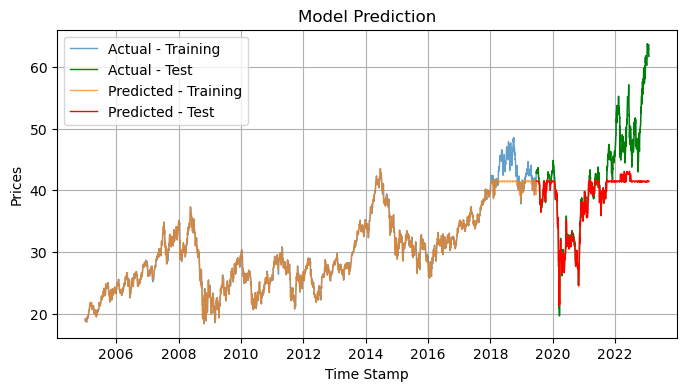

In [77]:
plt.figure(figsize=(8, 4))

plt.plot(merged_df.index, merged_df['Close_y'], label="Actual - Training", linewidth=1, alpha=0.7)
plt.plot(merged_df.index[-909:], merged_df['Close_y'][-909:], label="Actual - Test", color='green', linewidth=1)

plt.plot(merged_df.index, Predict_ADA, label="Predicted - Training", linewidth=1, alpha=0.7)
plt.plot(merged_df.index[-909:], Predict_ADA[-909:], label="Predicted - Test", color='red', linewidth=1)



plt.title('Model Prediction')
plt.xlabel('Time Stamp')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)

mplcursors.cursor(hover=False)

plt.show()

# XGBoost Regression (XGB) Model

### XGBoost Regression (XGB) Model
The train_xgboost_regression function trains an XGBoost regression model for stock price prediction using the provided training data. The function creates an XGBoost regression model using `XGBRegressor(objective='reg:squarederror')`. The objective is set to `reg:squarederror` for regression. Hyperparameters for the XGBoost regression model are defined in the hyperparameters dictionary. The `n_estimators`, `learning_rate`, and `max_depth` parameters are set to different values to be tuned. Grid search is performed to find the best hyperparameters for the XGBoost regression model using `GridSearchCV`. The predicted values for the target variable (`Close_y`) are calculated using the trained XGBoost regression model. The mean squared error (MSE) is calculated by comparing the predicted values with the actual values. 

Given a matrix of input vectors $\mathbf{X} = [\mathbf{x}_1, \mathbf{x}_2, ..., \mathbf{x}_n]$ and a corresponding vector of targets $\mathbf{y} = [y_1, y_2, ..., y_n]$, where each $\mathbf{x}_i$ is a feature vector and $y_i$ is the target value, the XGBoost Regression model computes the following:

**XGBoost Regression model**: XGBoost stands for eXtreme Gradient Boosting, which is an ensemble learning method that uses a collection of decision tree regressors. XGBoost is different from AdaBoost as it uses a gradient boosting framework which optimizes for better accuracy and computational efficiency. It corrects the residuals of the previous tree in each boosting round.

Weak learner: A Decision Tree Regressor is used as the base estimator for the XGBoost model. Given an input vector $\mathbf{x}_i$, a Decision Tree Regressor predicts the target value $\hat{y}_i$ by recursively splitting the feature space according to a set of learned decision rules.

Hyperparameters: The XGBoost Regression model has three main hyperparameters:

n_estimators: The number of boosting stages or decision trees to be used. Each stage includes one decision tree that corrects the residuals of the previous stage.
learning_rate: It is also known as "eta". It shrinks the feature weights to make the boosting process more conservative and prevents overfitting.
max_depth: The maximum depth of a decision tree. Deeper trees can model more complex relationships by adding more nodes, but as depth increases, the model becomes more likely to overfit.
The hyperparameters are tuned using cross-validation to find the values that minimize the Mean Squared Error (MSE) on the validation set.

In [78]:
def train_xgboost_regression(X_train1, Y_train1, scaled_merged_df, scaler, merged_df):
    model_XGB = XGBRegressor(objective='reg:squarederror')

    hyperparameters = {
        'n_estimators': [20, 30, 40],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 9]
    }

    grid_search_XGB = GridSearchCV(model_XGB, hyperparameters, cv=5, scoring='neg_mean_squared_error')

    grid_search_XGB.fit(np.squeeze(X_train1), np.squeeze(Y_train1))

    scaled_merged_df_XGB = scaled_merged_df.copy()
    scaled_merged_df_XGB['Close_y'] = grid_search_XGB.predict(scaled_merged_df_XGB.values)

    Predict_XGB = scaler.inverse_transform(scaled_merged_df_XGB)
    Predict_XGB = pd.DataFrame(Predict_XGB, columns=scaled_merged_df.columns)
    Predict_XGB = Predict_XGB['Close_y']

    mse = mean_squared_error(merged_df['Close_y'].values, Predict_XGB.values)
    rmse = mean_squared_error(merged_df['Close_y'].values, Predict_XGB.values, squared=False)

    print(f'Mean Squared Error on validation set: {mse}')

    return rmse, mse, Predict_XGB, grid_search_XGB

rmse_XGB, mse_XGB, Predict_XGB, grid_search_XGB = train_xgboost_regression(X_train1, Y_train1, scaled_merged_df, scaler, merged_df)

Mean Squared Error on validation set: 8.22939829330503


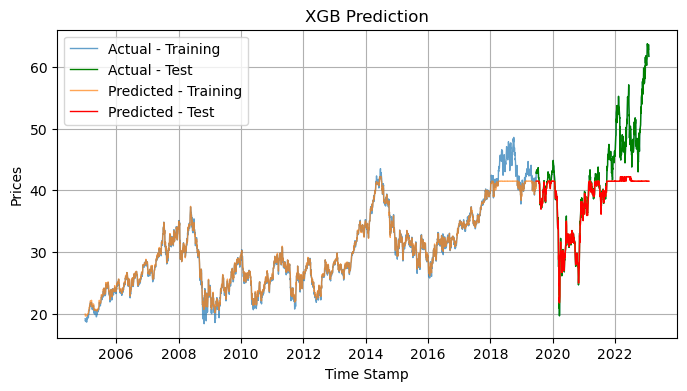

In [79]:
plt.figure(figsize=(8, 4))

plt.plot(merged_df.index, merged_df['Close_y'], label="Actual - Training", linewidth=1, alpha=0.7)
plt.plot(merged_df.index[-909:], merged_df['Close_y'][-909:], label="Actual - Test", color='green', linewidth=1)

plt.plot(merged_df.index, Predict_XGB, label="Predicted - Training", linewidth=1, alpha=0.7)
plt.plot(merged_df.index[-909:], Predict_XGB[-909:], label="Predicted - Test", color='red', linewidth=1)



plt.title('XGB Prediction')
plt.xlabel('Time Stamp')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)

mplcursors.cursor(hover=False)

plt.show()

### Comparing Machine Learning Models

%matplotlib notebook


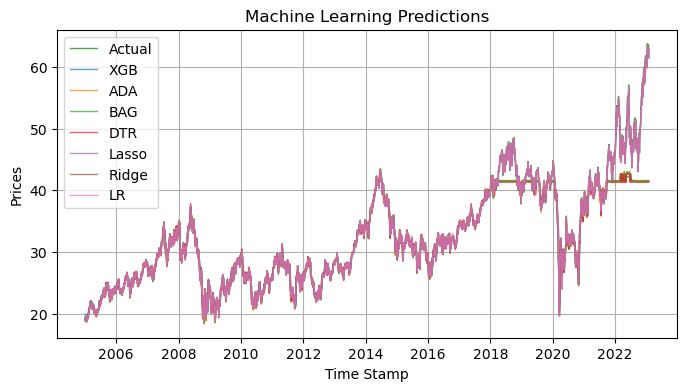

In [80]:
plt.figure(figsize=(8, 4))

plt.plot(merged_df.index, merged_df['Close_y'], label="Actual", color='green', linewidth=1, alpha=0.7)

plt.plot(merged_df.index, Predict_XGB, label="XGB", linewidth=1, alpha=0.7)
plt.plot(merged_df.index, Predict_ADA, label="ADA", linewidth=1, alpha=0.7)
plt.plot(merged_df.index, Predict_BAG, label="BAG", linewidth=1, alpha=0.7)
plt.plot(merged_df.index, Predict_DTR, label="DTR", linewidth=1, alpha=0.7)
plt.plot(merged_df.index, Predict_Lasso, label="Lasso", linewidth=1, alpha=0.7)
plt.plot(merged_df.index, Predict_Ridge, label="Ridge", linewidth=1, alpha=0.7)
plt.plot(merged_df.index, Predict_LR, label="LR", linewidth=1, alpha=0.7)

plt.title('Machine Learning Predictions')
plt.xlabel('Time Stamp')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)

mplcursors.cursor(hover=True)

plt.show()

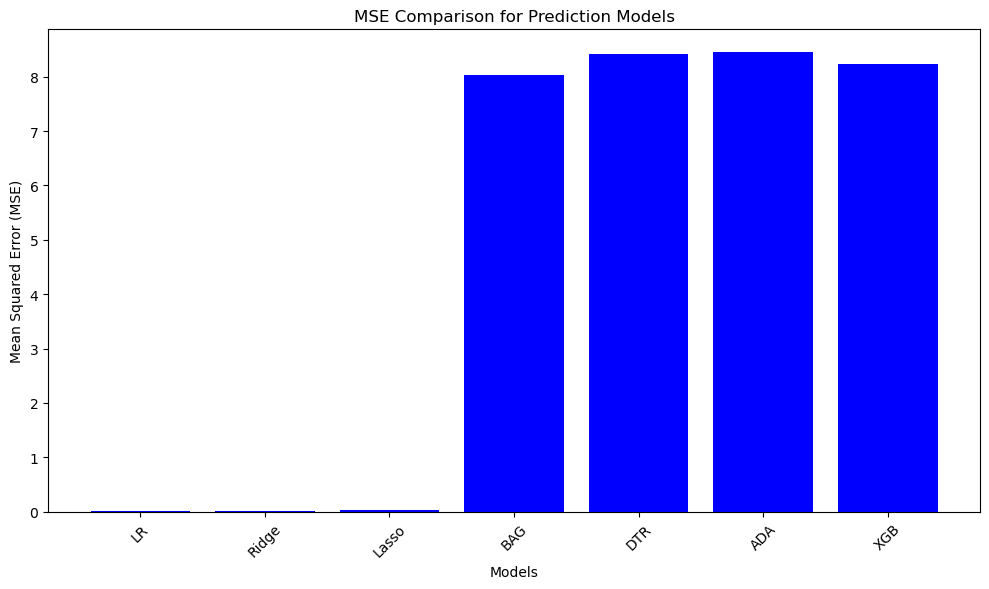

In [81]:
models_name = ['LR', 'Ridge', 'Lasso', 'BAG', 'DTR','ADA', 'XGB']
mse_values = [mse_LR, mse_Ridge, mse_Lasso,  mse_BAG, mse_DTR, mse_ADA, mse_XGB]

plt.figure(figsize=(10, 6))
plt.bar(models_name, mse_values, color='blue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison for Prediction Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

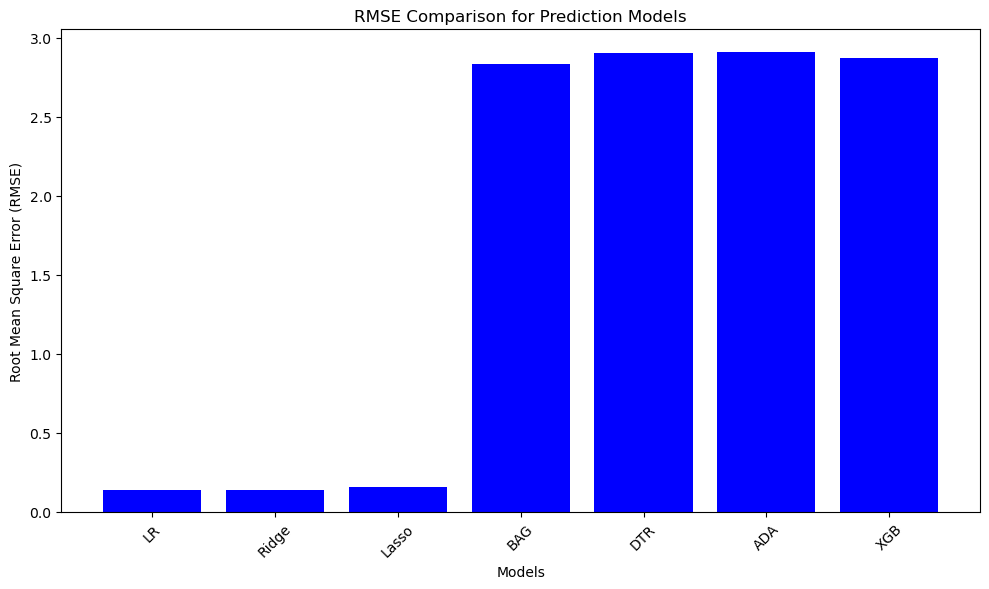

In [82]:
rmse_values = [rmse_LR, rmse_Ridge, rmse_Lasso,  rmse_BAG, rmse_DTR, rmse_ADA, rmse_XGB]

plt.figure(figsize=(10, 6))
plt.bar(models_name, rmse_values, color='blue')
plt.xlabel('Models')
plt.ylabel('Root Mean Square Error (RMSE)')
plt.title('RMSE Comparison for Prediction Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Buy & Sell Signal

### Selected Models:
The selection of models for the next phase of our research will be guided by their overall Mean Squared Error (MSE) performance. Models that demonstrate superior results in this metric will advance to the subsequent stage, where we'll employ their predictions to generate buy and sell signals. The model that yields the highest return on an initial investment of 100 dollars will be considered the most effective. For the purposes of this experiment, transaction costs have not been taken into account.
#### Deep Learning Models:
1. WN : WaveNet
2. GRU : Gated Recurrent Unit
3. CNN : Convolutional Neural Network
4. TCN : Temporal Convolutional Network

#### Machine Learning Models:
1. LR : Linear Regression
2. Ridge : Ridge Regression
3. Lasso : Lasso Regression

### MA3 & MA7 for Predictions
In the code below, the `process_data_and_calculate_metrics()` function is called with the predictions obtained from previous machine learning and deep learning models. The resulting DataFrame will contain the original predictions along with additional columns for the calculated moving averages (MA3 and MA7) for each prediction.

In [83]:
def process_data_and_calculate_metrics(predictions_values, column_names, num_elements=909):
    
    new_df = pd.DataFrame()
    for i, column_name in enumerate(column_names):
        new_df[column_name] = predictions_values[i]
    
    new_df = new_df.tail(num_elements)


    for col_name in column_names:
        new_df[f'MA3 {col_name}'] = new_df[col_name].rolling(window=3, min_periods=1).mean()
        new_df[f'MA7 {col_name}'] = new_df[col_name].rolling(window=7, min_periods=1).mean()

    return new_df
column_names = ["Predict_WN", "Predict_GRU", "Predict_CNN", "Predict_TCN", "Predict_LR", "Predict_Ridge", "Predict_Lasso"]
predictions_values = [Predict_WN, Predict_GRU, Predict_CNN,  Predict_TCN, Predict_LR, Predict_Ridge, Predict_Lasso]
df_predictions = process_data_and_calculate_metrics(predictions_values, column_names, num_elements=909)

### Generating Buy & Sell Signal

The function `generate_df_and_signals()` is applied to the predictions from the WaveNet, GRU, CNN, TCN, Linear Regression, Ridge, and Lasso models to generate trading signals based on their predicted moving averages. The function calculates the difference between the predicted moving averages (for each of MA3 and MA7) and the actual moving averages. Then generates trading signals based on the changes in the differences calculated in the previous step. If the difference for a moving average changes from positive to negative (i.e., the predicted moving average goes from above to below the actual moving average), a buy signal of +1 is generated. If the difference changes from negative to positive (i.e., the predicted moving average goes from below to above the actual moving average), a sell signal of -1 is generated.

In [84]:
def generate_df_and_signals(df_predictions, merged_df, search_term):
    df_predictions_cols = [col for col in df_predictions.columns if search_term in col]
    df_predictions_subset = df_predictions[df_predictions_cols].tail(909).reset_index(drop=True)
    
    merged_df_subset = merged_df[['MA3', 'MA7', 'Close_y']].tail(909).reset_index(drop=True)

    new_df = pd.concat([merged_df_subset, df_predictions_subset], axis=1)
    new_df.index = merged_df.tail(909).index

    new_df['temp_diff_MA7'] = new_df[f'MA7 {search_term}'] - new_df['MA7']
    new_df['temp_diff_MA3'] = new_df[f'MA3 {search_term}'] - new_df['MA3']

    new_df['MA7 Signal'] = np.where((new_df['temp_diff_MA7'] < 0) & (new_df['temp_diff_MA7'].shift() > 0), +1, 0)
    new_df['MA3 Signal'] = np.where((new_df['temp_diff_MA3'] < 0) & (new_df['temp_diff_MA3'].shift() > 0), +1, 0)

    new_df['MA7 Signal'] = np.where((new_df['temp_diff_MA7'] > 0) & (new_df['temp_diff_MA7'].shift() < 0), -1, new_df['MA7 Signal'])
    new_df['MA3 Signal'] = np.where((new_df['temp_diff_MA3'] > 0) & (new_df['temp_diff_MA3'].shift() < 0), -1, new_df['MA3 Signal'])

    new_df = new_df.drop(columns=['temp_diff_MA7', 'temp_diff_MA3'])

    return new_df

WN_Signals = generate_df_and_signals(df_predictions, merged_df, 'Predict_WN')
GRU_Signals = generate_df_and_signals(df_predictions, merged_df, 'Predict_GRU')
CNN_Signals = generate_df_and_signals(df_predictions, merged_df, 'Predict_CNN')
TCN_Signals = generate_df_and_signals(df_predictions, merged_df, 'Predict_TCN')
LR_Signals = generate_df_and_signals(df_predictions, merged_df, 'Predict_LR')
Ridge_Signals = generate_df_and_signals(df_predictions, merged_df, 'Predict_Ridge')
Lasso_Signals = generate_df_and_signals(df_predictions, merged_df, 'Predict_Lasso')

### Ploting the Signals and MA7

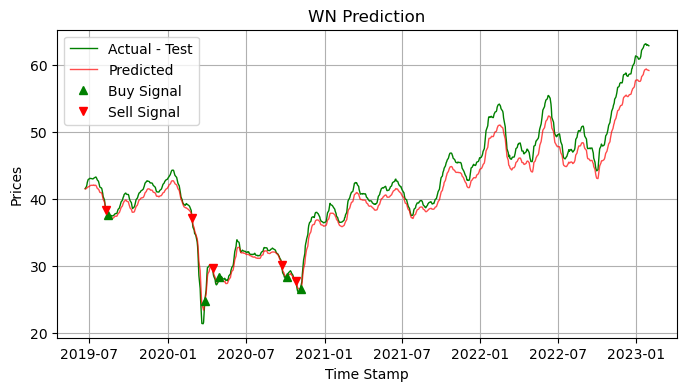

In [85]:
plt.figure(figsize=(8, 4))

plt.plot(merged_df.index[-909:], merged_df['MA7'][-909:], label="Actual - Test", color='green', linewidth=1)

plt.plot(WN_Signals.index, WN_Signals['MA7 Predict_WN'], label="Predicted", color='red', linewidth=1, alpha=0.7)

buy_signals = WN_Signals[WN_Signals['MA7 Signal'] == +1]
sell_signals = WN_Signals[WN_Signals['MA7 Signal'] == -1]

plt.plot(buy_signals.index, buy_signals['MA7 Predict_WN'], 'g^', label='Buy Signal')
plt.plot(sell_signals.index, sell_signals['MA7 Predict_WN'], 'rv', label='Sell Signal')

plt.title('WN Prediction')
plt.xlabel('Time Stamp')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)

mplcursors.cursor(hover=False)

plt.show()

### Trading Simulation
The function `calculate_profit()` simulates trading based on the generated signals and calculates the potential profit that can be made from trading based on these signals. The function first initializes several variables - funds is initialized to the initial investment, quantity is set to 0.0, and profit is also set to 0.0. Then it iterates through the DataFrame. For each row, it checks the signal and the closing price. If the signal is +1 (indicating a "buy" signal) and there are funds available, it calculates the quantity of stocks that can be bought with the available funds and sets the funds to 0.0. If the signal is -1 (indicating a "sell" signal) and there are stocks in hand (quantity > 0), it calculates the total funds that can be obtained by selling the stocks and sets the quantity to 0.0. After going through all the rows in the DataFrame, the function checks the last signal and the last closing price. If the last signal is -1, it implies that all stocks were sold, and the final funds remain the same. If the last signal is +1 or 0, it implies that stocks were bought or held, and the final funds are calculated by multiplying the quantity of stocks owned by the last_close_price. The profit is then calculated by subtracting the `initial_investment` from the `final_funds`.

This function returns the profit made from trading based on the signals in the DataFrame. It simulates a straightforward trading strategy where all available funds are used to buy stocks when a buy signal is encountered, and all stocks are sold when a sell signal is encountered. **The function assumes there are no transaction costs or taxes, which is not usually the case in real-world trading.**

In [86]:
def calculate_profit(df, signal_column, initial_investment=1000.0):
    funds = initial_investment
    quantity = 0.0
    profit = 0.0

    for _, row in df.iterrows():
        signal = row[signal_column]
        close_price = row['Close_y']

        if signal == +1 and funds > 0:
            quantity = funds / close_price
            funds = 0.0

        elif signal == -1 and quantity > 0:
            funds = quantity * close_price
            quantity = 0.0

    last_signal = df.iloc[-1][signal_column]
    last_close_price = df.iloc[-1]['Close_y']

    if last_signal == -1:
        final_funds = funds
    else:
        final_funds = quantity * last_close_price

    profit = final_funds - initial_investment

    return profit

In [87]:
dfs = {
    'WN': WN_Signals,
    'GRU': GRU_Signals, 
    'CNN': CNN_Signals,
    'TCN': TCN_Signals,
    'LR': LR_Signals,
    'Ridge': Ridge_Signals,
    'Lasso': Lasso_Signals
}

signal_columns = ['MA3 Signal', 'MA7 Signal']

profits = {}

for model, df in dfs.items():
    for signal_column in signal_columns:
        profit = calculate_profit(df, signal_column, initial_investment=100.0)
        
        profits[f'{model}_Profit_{signal_column}'] = profit

### Ploting the results

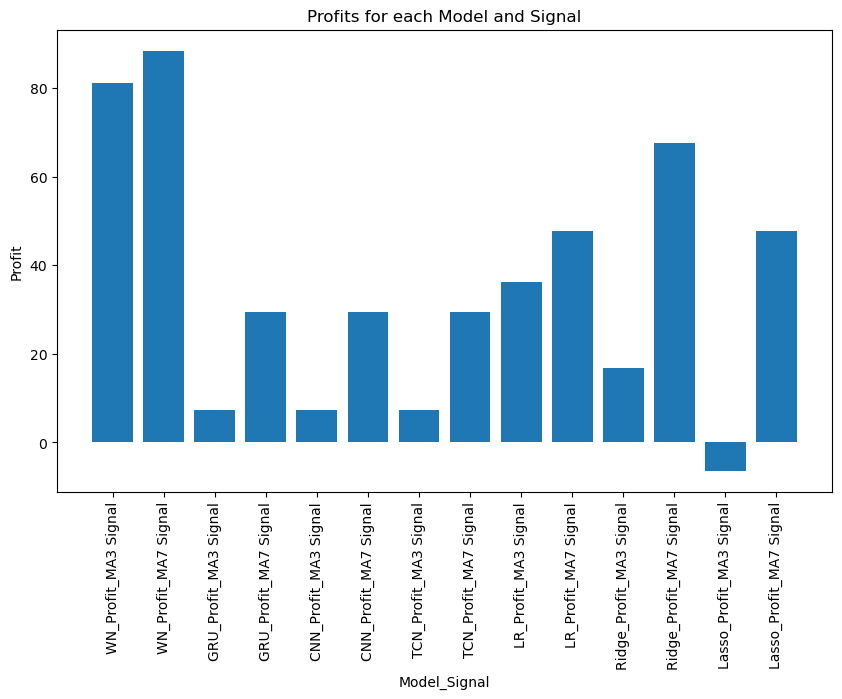

In [88]:
plt.figure(figsize=(10,6))
plt.bar(profits.keys(), profits.values())
plt.xlabel('Model_Signal')
plt.ylabel('Profit')
plt.title('Profits for each Model and Signal')
plt.xticks(rotation=90)
plt.show()